## Importing the libraries

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [12]:
original_dataset = pd.read_csv('heart.csv')
original_dataset

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

## Statistical Analysis

In [13]:
original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
original_dataset.isnull().sum()   # no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
original_dataset.duplicated().sum()  # duplicates found

723

In [16]:
dataset = original_dataset.drop_duplicates()    # remove duplicate
dataset.duplicated().sum()

0

In [17]:
dataset.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

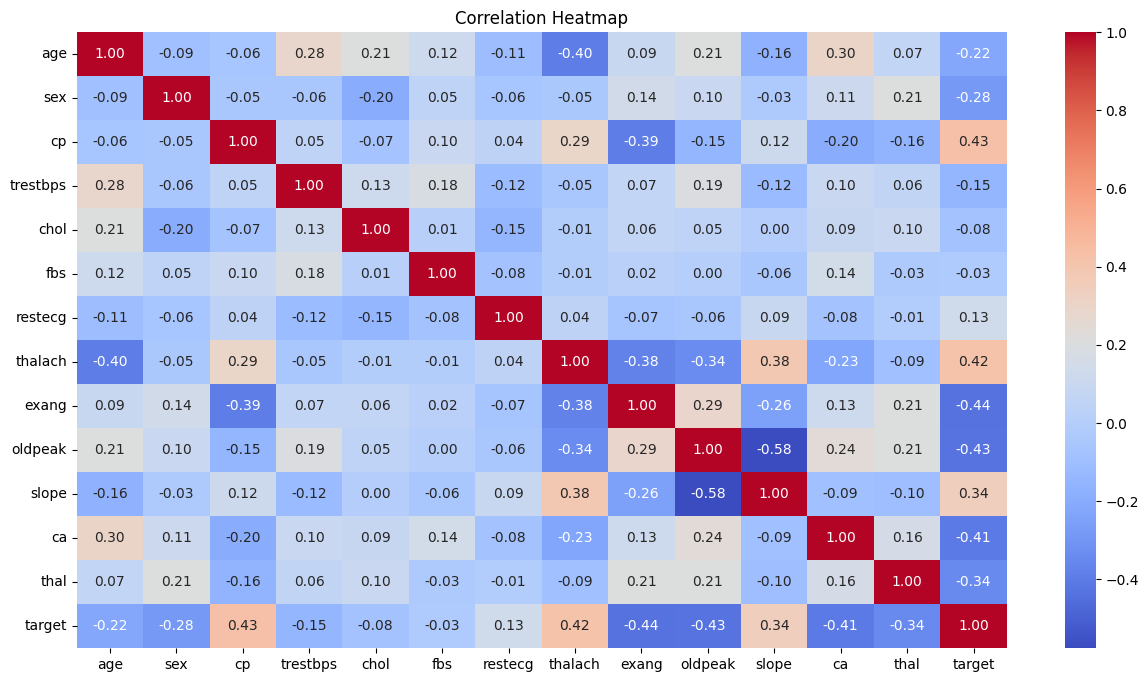

In [18]:
corr_matrix = dataset.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# Dropping Features with Low Coorelation
columns_to_drop = ["chol", "fbs"]
dataset = dataset.drop(columns=columns_to_drop , axis=1)

In [20]:
dataset

age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  \
0     52    1   0       125        1      168      0      1.0      2   2   
1     53    1   0       140        0      155      1      3.1      0   0   
2     70    1   0       145        1      125      1      2.6      0   0   
3     61    1   0       148        1      161      0      0.0      2   1   
4     62    0   0       138        1      106      0      1.9      1   3   
..   ...  ...  ..       ...      ...      ...    ...      ...    ...  ..   
723   68    0   2       120        0      115      0      1.5      1   0   
733   44    0   2       108        1      175      0      0.6      1   0   
739   52    1   0       128        1      161      1      0.0      2   1   
843   59    1   3       160        0      125      0      0.0      2   0   
878   54    1   0       120        1      113      0      1.4      1   1   

     thal  target  
0       3       0  
1       3       0  
2       3       0  
3       3       0  
4       2       0  
..    ...     ...  
723     2       1  
733     2       1  
739     3       0  
843     2       0  
878     3       0  

[302 rows x 12 columns]

## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["target"])
y = dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train

age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  thal
163   48    1   0       124        0      166      0      0.5      1   0     3
291   58    1   0       128        0      130      1      3.0      1   2     3
280   45    0   1       130        0      175      0      0.6      1   0     2
85    44    1   1       120        1      170      0      0.0      2   0     2
239   62    0   0       150        1      154      1      1.4      1   0     2
..   ...  ...  ..       ...      ...      ...    ...      ...    ...  ..   ...
267   67    1   0       120        1       71      0      1.0      1   0     2
77    63    1   0       140        0      144      1      4.0      2   2     3
125   60    0   3       150        1      171      0      0.9      2   0     2
522   67    0   2       152        1      172      0      0.0      2   1     2
119   42    1   1       120        1      162      0      0.0      2   0     2

[241 rows x 11 columns]

In [23]:
X_test

age  sex  cp  trestbps  restecg  thalach  exang  oldpeak  slope  ca  thal
245   44    1   1       130        0      188      0      0.0      2   0     2
349   62    0   2       130        1       97      0      1.2      1   1     3
135   58    0   0       170        0      146      1      2.8      1   2     1
389   63    1   3       145        0      150      0      2.3      0   0     1
66    53    1   2       130        0      152      0      1.2      0   0     2
..   ...  ...  ..       ...      ...      ...    ...      ...    ...  ..   ...
402   70    1   1       156        0      143      0      0.0      2   0     2
123   65    0   2       140        0      157      0      0.8      2   1     2
739   52    1   0       128        1      161      1      0.0      2   1     3
274   66    1   0       160        0      138      0      2.3      2   0     1
256   35    0   0       138        1      182      0      1.4      2   0     2

[61 rows x 11 columns]

In [24]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [25]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

#### Modeling by doing Logistic Regression (without doing feature scaling)

In [26]:
# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Feature Scaling on Training Set & Test Set

## Standardization
a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [27]:
import seaborn as sns

sns.set_theme(palette="rainbow", style="darkgrid")

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_standard_scaled = scaler.fit_transform(X_train)
X_test_standard_scaled = scaler.fit_transform(X_test)

# Convert the scaled features back to a DataFrame (if needed)
X_train_standard_scaled_df = pd.DataFrame(X_train_standard_scaled, columns=X_train.columns)
X_test_standard_scaled_df = pd.DataFrame(X_test_standard_scaled , columns=X_test.columns)

In [29]:
X_train_standard_scaled_df

age       sex        cp  trestbps   restecg   thalach     exang  \
0   -0.682633  0.685210 -0.980054 -0.403153 -1.024877  0.717007 -0.718139   
1    0.403989  0.685210 -0.980054 -0.171406 -1.024877 -0.836627  1.392489   
2   -1.008619 -1.459407 -0.004050 -0.055533 -1.024877  1.105415 -0.718139   
3   -1.117282  0.685210 -0.004050 -0.634899  0.860584  0.889633 -0.718139   
4    0.838637 -1.459407 -0.980054  1.103201  0.860584  0.199129  1.392489   
..        ...       ...       ...       ...       ...       ...       ...   
236  1.381948  0.685210 -0.980054 -0.634899  0.860584 -3.382861 -0.718139   
237  0.947300  0.685210 -0.980054  0.523834 -1.024877 -0.232436  1.392489   
238  0.621313 -1.459407  1.947959  1.103201  0.860584  0.932789 -0.718139   
239  1.381948 -1.459407  0.971955  1.219074  0.860584  0.975946 -0.718139   
240 -1.334606  0.685210 -0.004050 -0.634899  0.860584  0.544381 -0.718139   

      oldpeak     slope        ca      thal  
0   -0.447524 -0.715539 -0.705536  1.118119  
1    1.768032 -0.715539  1.248879  1.118119  
2   -0.358902 -0.715539 -0.705536 -0.545256  
3   -0.890635  0.991836 -0.705536 -0.545256  
4    0.350076 -0.715539 -0.705536 -0.545256  
..        ...       ...       ...       ...  
236 -0.004413 -0.715539 -0.705536 -0.545256  
237  2.654254  0.991836  1.248879  1.118119  
238 -0.093035  0.991836 -0.705536 -0.545256  
239 -0.890635  0.991836  0.271672 -0.545256  
240 -0.890635  0.991836 -0.705536 -0.545256  

[241 rows x 11 columns]

In [30]:
X_test_standard_scaled_df

age       sex        cp  trestbps   restecg   thalach     exang  \
0  -1.320464  0.672593  0.189642 -0.225927 -0.921132  1.745643 -0.621582   
1   0.846755 -1.486784  1.153655 -0.225927  1.085620 -2.467429 -0.621582   
2   0.365151 -1.486784 -0.774371  1.952976 -0.921132 -0.198852  1.608799   
3   0.967156  0.672593  2.117667  0.591161 -0.921132 -0.013662 -0.621582   
4  -0.236855  0.672593  1.153655 -0.225927 -0.921132  0.078933 -0.621582   
..       ...       ...       ...       ...       ...       ...       ...   
56  1.809964  0.672593  0.189642  1.190360 -0.921132 -0.337744 -0.621582   
57  1.207959 -1.486784  1.153655  0.318799 -0.921132  0.310421 -0.621582   
58 -0.357256  0.672593 -0.774371 -0.334872  1.085620  0.495611  1.608799   
59  1.328360  0.672593 -0.774371  1.408250 -0.921132 -0.569231 -0.621582   
60 -2.404074 -1.486784 -0.774371  0.209853  1.085620  1.467858 -0.621582   

     oldpeak     slope        ca      thal  
0  -0.944189  0.964562 -0.758482 -0.403290  
1   0.005188 -0.436349  0.317504  1.134254  
2   1.271024 -0.436349  1.393491 -1.940834  
3   0.875450 -1.837261 -0.758482 -1.940834  
4   0.005188 -1.837261 -0.758482 -0.403290  
..       ...       ...       ...       ...  
56 -0.944189  0.964562 -0.758482 -0.403290  
57 -0.311271  0.964562  0.317504 -0.403290  
58 -0.944189  0.964562  0.317504  1.134254  
59  0.875450  0.964562 -0.758482 -1.940834  
60  0.163417  0.964562 -0.758482 -0.403290  

[61 rows x 11 columns]

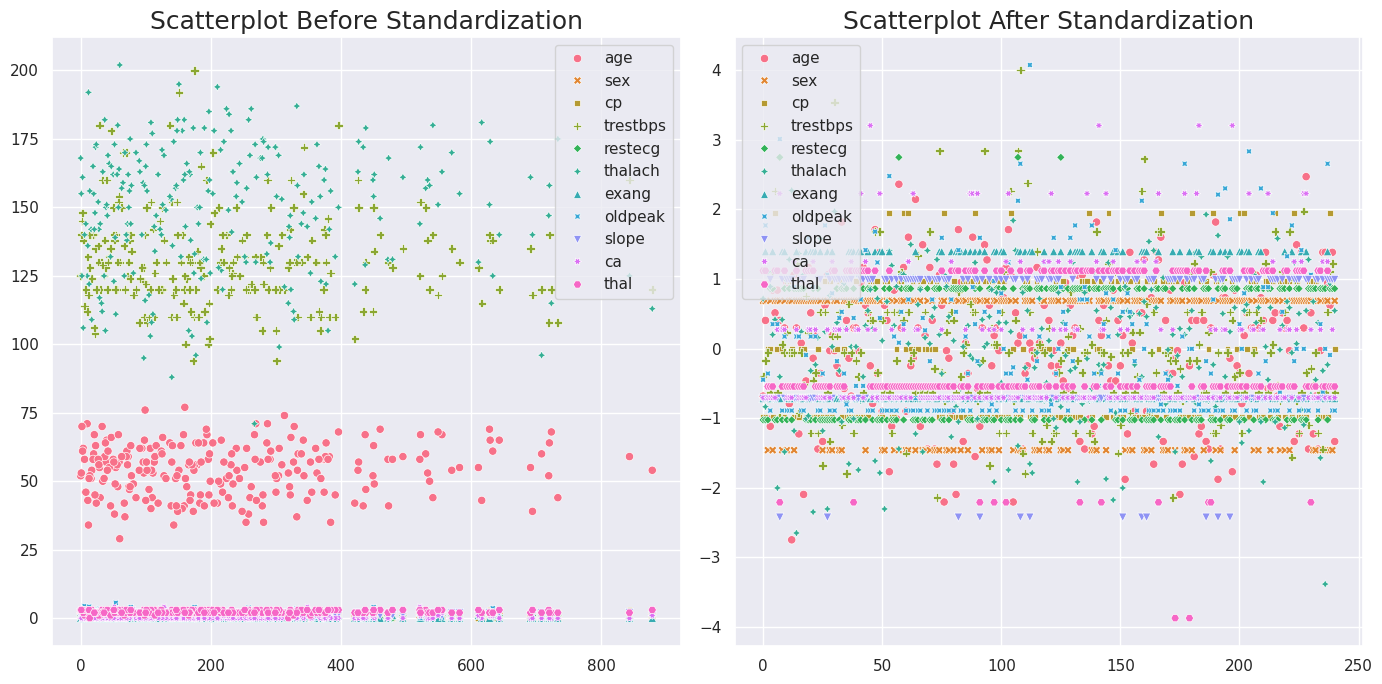

In [31]:
# plotting the scatterplot of before and after Standardization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Standardization", fontsize=18)
sns.scatterplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Standardization", fontsize=18)
sns.scatterplot(data = X_train_standard_scaled_df, color="red")
plt.tight_layout()
plt.show()

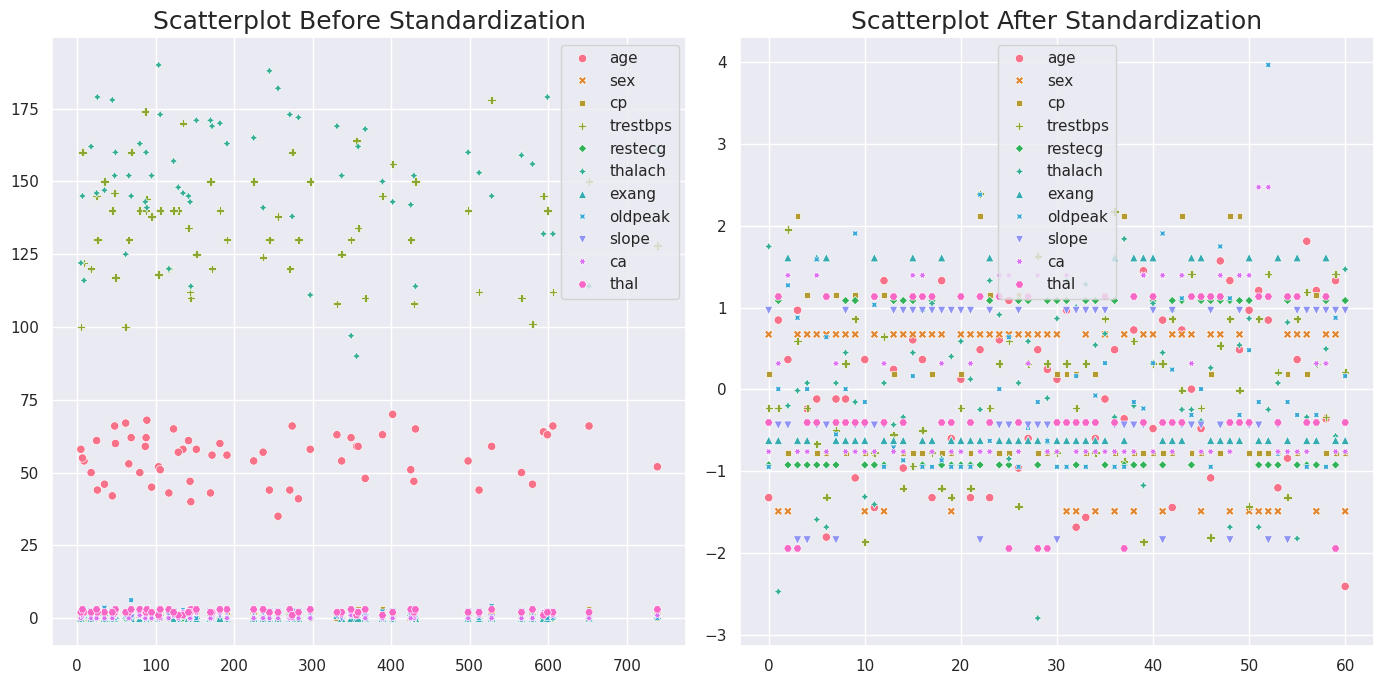

In [32]:
# plotting the scatterplot of before and after Standardization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Standardization", fontsize=18)
sns.scatterplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Standardization", fontsize=18)
sns.scatterplot(data = X_test_standard_scaled_df, color="red")
plt.tight_layout()
plt.show()

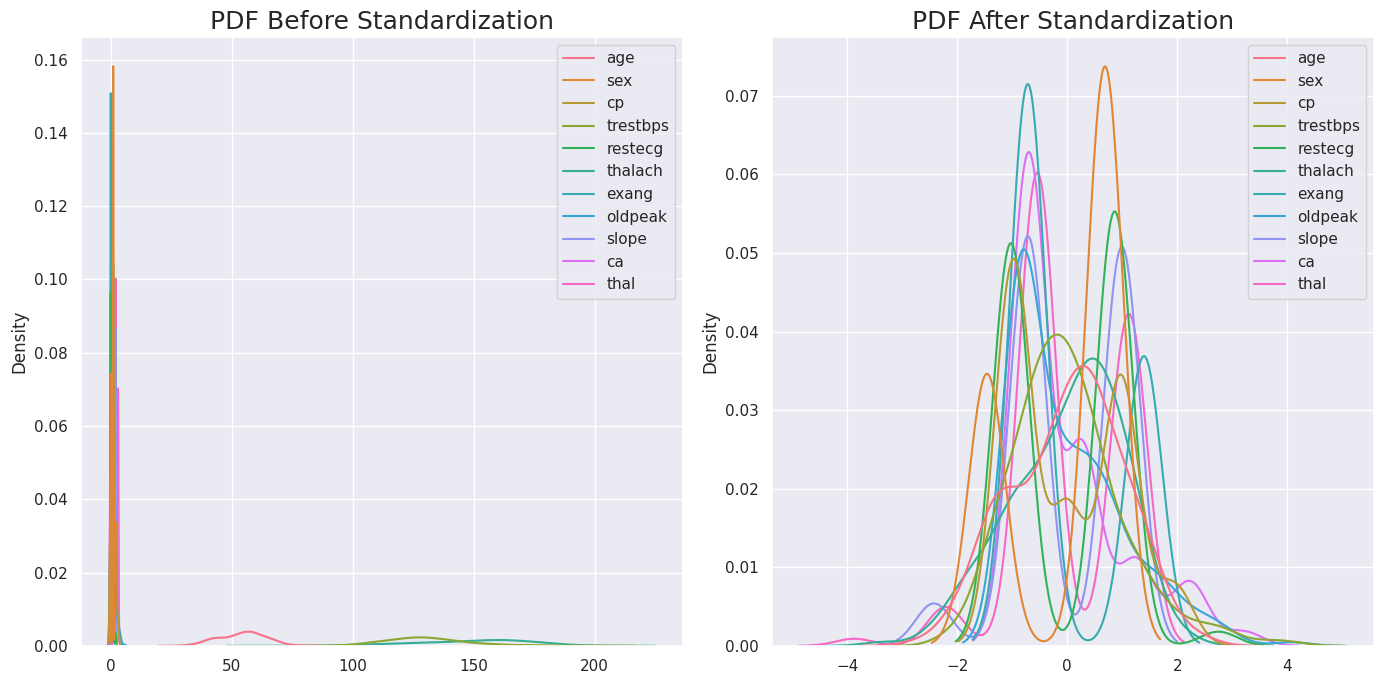

In [33]:
# plotting the PDF graph of before and after Standardization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Standardization", fontsize=18)
sns.kdeplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Standardization", fontsize=18)
sns.kdeplot(data = X_train_standard_scaled_df, color="red")
plt.tight_layout()
plt.show()

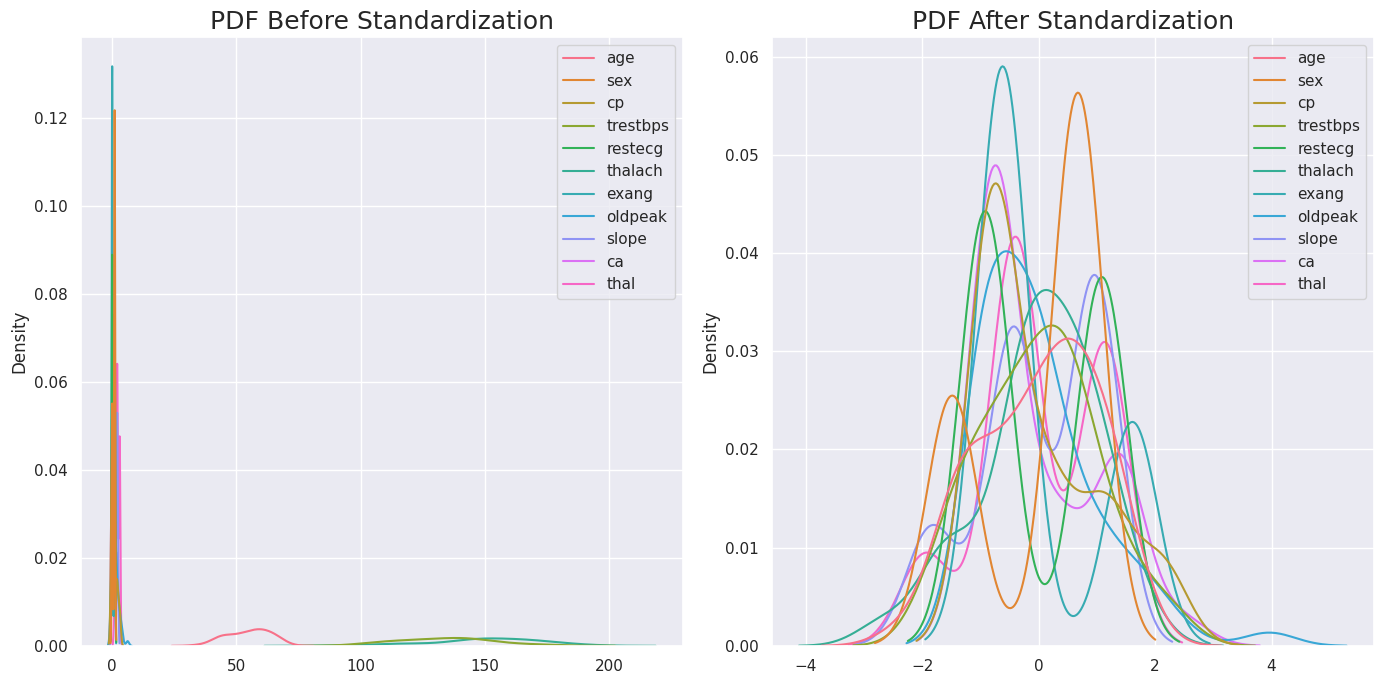

In [34]:
# plotting the PDF graph of before and after Standardization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Standardization", fontsize=18)
sns.kdeplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Standardization", fontsize=18)
sns.kdeplot(data = X_test_standard_scaled_df, color="red")
plt.tight_layout()
plt.show()

#### Modeling by doing Logistic Regression

In [35]:
# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train_standard_scaled_df, y_train)

# Making predictions
y_pred = model.predict(X_test_standard_scaled_df)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        32
           1       0.69      0.93      0.79        29

    accuracy                           0.77        61
   macro avg       0.80      0.78      0.77        61
weighted avg       0.81      0.77      0.77        61



## Normalization
The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

### Min Max Scaling
is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScalar
mm = MinMaxScaler()

# Scale the features
X_train_min_max_scaled = mm.fit_transform(X_train)
X_test_min_max_scaled = mm.fit_transform(X_test)

# Convert the scaled features back to a DataFrame
X_train_min_max_scaled_df = pd.DataFrame(X_train_min_max_scaled, columns=X_train.columns)
X_test_min_max_scaled_df = pd.DataFrame(X_test_min_max_scaled , columns=X_test.columns)

In [37]:
X_train_min_max_scaled_df

age  sex        cp  trestbps  restecg   thalach  exang   oldpeak  \
0    0.395833  1.0  0.000000  0.283019      0.0  0.725191    0.0  0.089286   
1    0.604167  1.0  0.000000  0.320755      0.0  0.450382    1.0  0.535714   
2    0.333333  0.0  0.333333  0.339623      0.0  0.793893    0.0  0.107143   
3    0.312500  1.0  0.333333  0.245283      0.5  0.755725    0.0  0.000000   
4    0.687500  0.0  0.000000  0.528302      0.5  0.633588    1.0  0.250000   
..        ...  ...       ...       ...      ...       ...    ...       ...   
236  0.791667  1.0  0.000000  0.245283      0.5  0.000000    0.0  0.178571   
237  0.708333  1.0  0.000000  0.433962      0.0  0.557252    1.0  0.714286   
238  0.645833  0.0  1.000000  0.528302      0.5  0.763359    0.0  0.160714   
239  0.791667  0.0  0.666667  0.547170      0.5  0.770992    0.0  0.000000   
240  0.270833  1.0  0.333333  0.245283      0.5  0.694656    0.0  0.000000   

     slope    ca      thal  
0      0.5  0.00  1.000000  
1      0.5  0.50  1.000000  
2      0.5  0.00  0.666667  
3      1.0  0.00  0.666667  
4      0.5  0.00  0.666667  
..     ...   ...       ...  
236    0.5  0.00  0.666667  
237    1.0  0.50  1.000000  
238    1.0  0.00  0.666667  
239    1.0  0.25  0.666667  
240    1.0  0.00  0.666667  

[241 rows x 11 columns]

In [38]:
X_test_min_max_scaled_df

age  sex        cp  trestbps  restecg  thalach  exang   oldpeak  \
0   0.257143  1.0  0.333333  0.384615      0.0     0.98    0.0  0.000000   
1   0.771429  0.0  0.666667  0.384615      1.0     0.07    0.0  0.193548   
2   0.657143  0.0  0.000000  0.897436      0.0     0.56    1.0  0.451613   
3   0.800000  1.0  1.000000  0.576923      0.0     0.60    0.0  0.370968   
4   0.514286  1.0  0.666667  0.384615      0.0     0.62    0.0  0.193548   
..       ...  ...       ...       ...      ...      ...    ...       ...   
56  1.000000  1.0  0.333333  0.717949      0.0     0.53    0.0  0.000000   
57  0.857143  0.0  0.666667  0.512821      0.0     0.67    0.0  0.129032   
58  0.485714  1.0  0.000000  0.358974      1.0     0.71    1.0  0.000000   
59  0.885714  1.0  0.000000  0.769231      0.0     0.48    0.0  0.370968   
60  0.000000  0.0  0.000000  0.487179      1.0     0.92    0.0  0.225806   

    slope        ca  thal  
0     1.0  0.000000   0.5  
1     0.5  0.333333   1.0  
2     0.5  0.666667   0.0  
3     0.0  0.000000   0.0  
4     0.0  0.000000   0.5  
..    ...       ...   ...  
56    1.0  0.000000   0.5  
57    1.0  0.333333   0.5  
58    1.0  0.333333   1.0  
59    1.0  0.000000   0.0  
60    1.0  0.000000   0.5  

[61 rows x 11 columns]

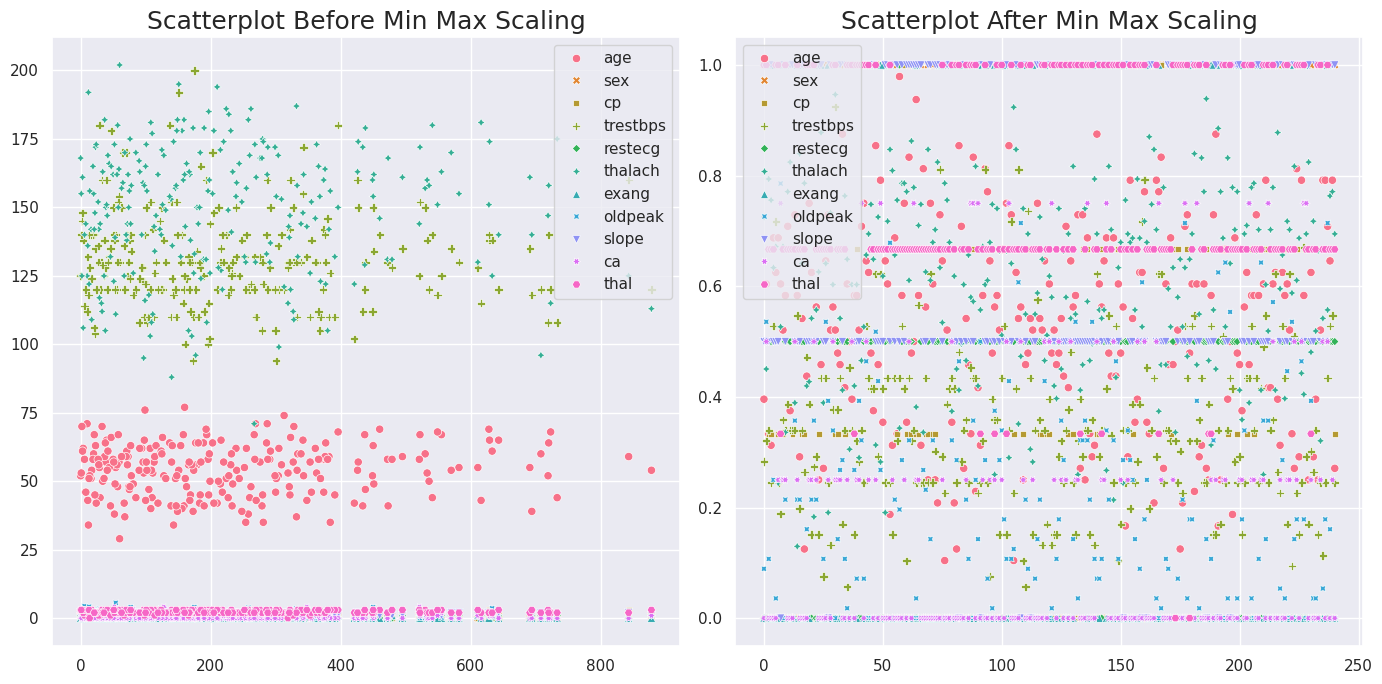

In [39]:
# plotting the scatterplot of before and after Min Max Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Min Max Scaling", fontsize=18)
sns.scatterplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Min Max Scaling", fontsize=18)
sns.scatterplot(data = X_train_min_max_scaled_df, color="red")
plt.tight_layout()
plt.show()

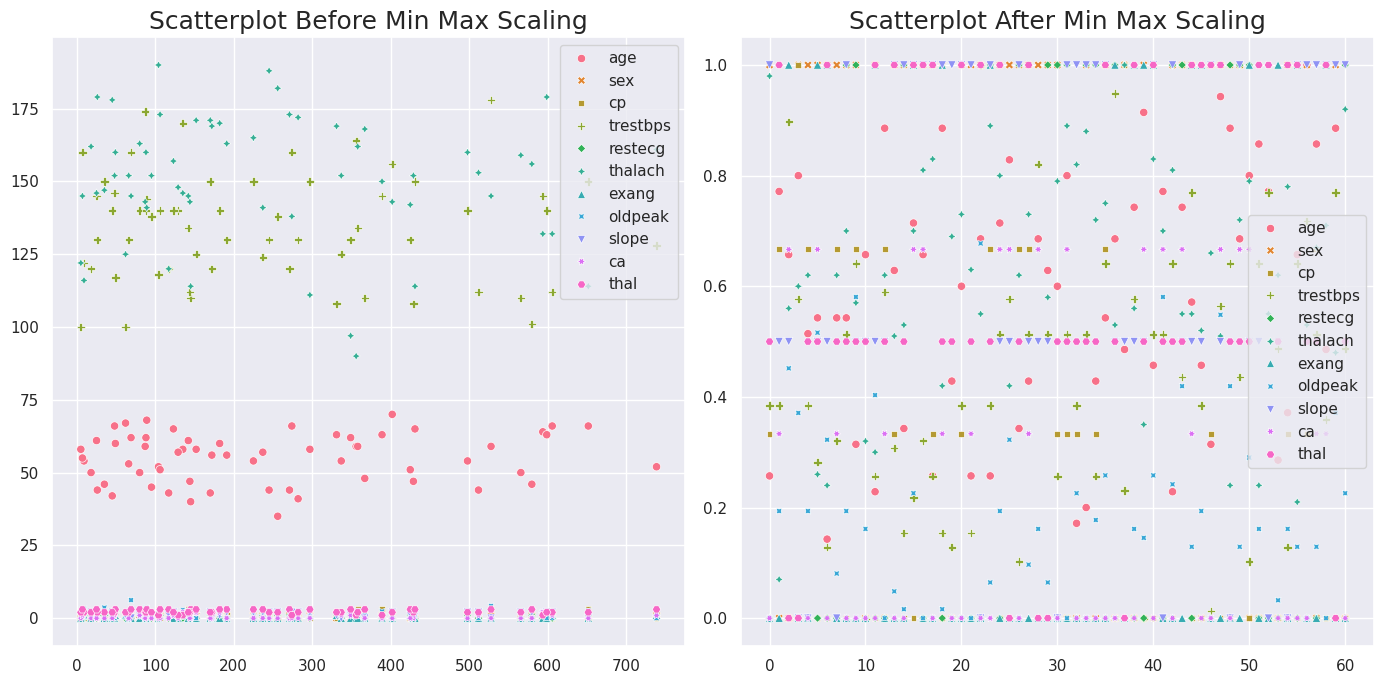

In [40]:
# plotting the scatterplot of before and after Min Max Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Min Max Scaling", fontsize=18)
sns.scatterplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Min Max Scaling", fontsize=18)
sns.scatterplot(data = X_test_min_max_scaled_df, color="red")
plt.tight_layout()
plt.show()

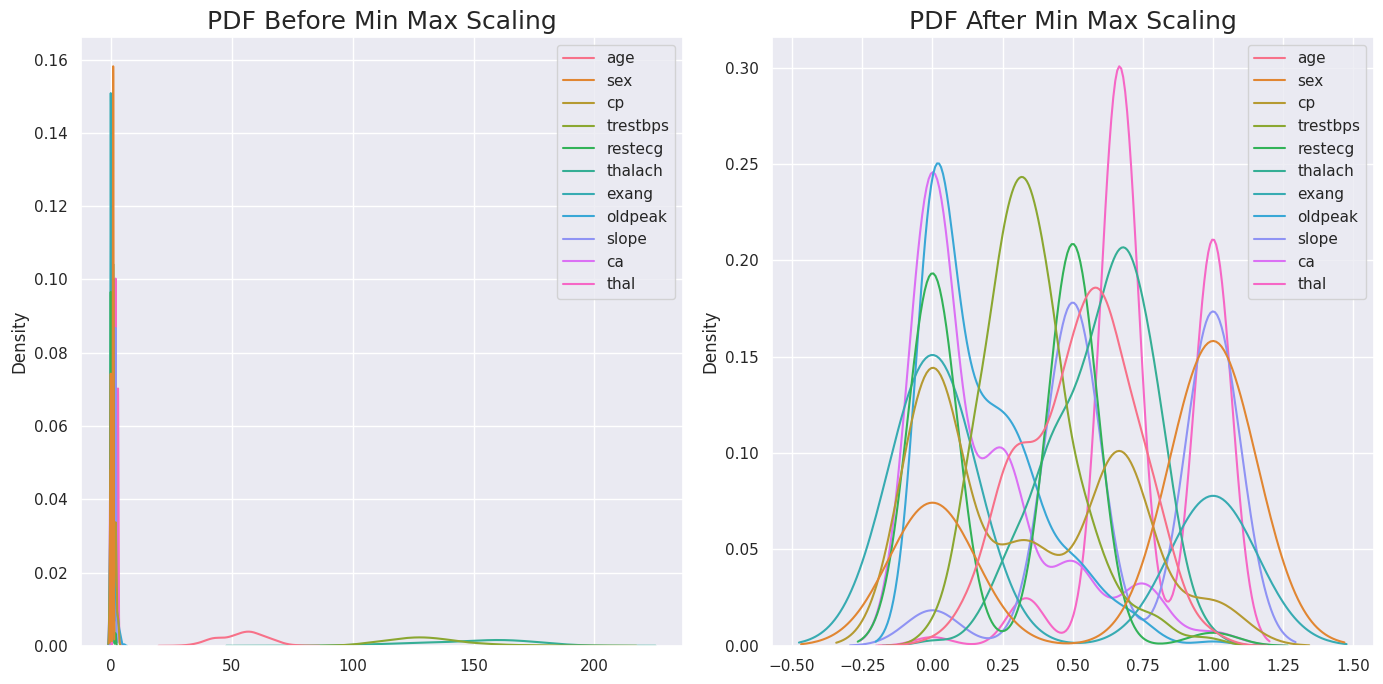

In [41]:
# plotting the PDF graph of before and after Min Max Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Min Max Scaling", fontsize=18)
sns.kdeplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Min Max Scaling", fontsize=18)
sns.kdeplot(data = X_train_min_max_scaled_df, color="red")
plt.tight_layout()
plt.show()

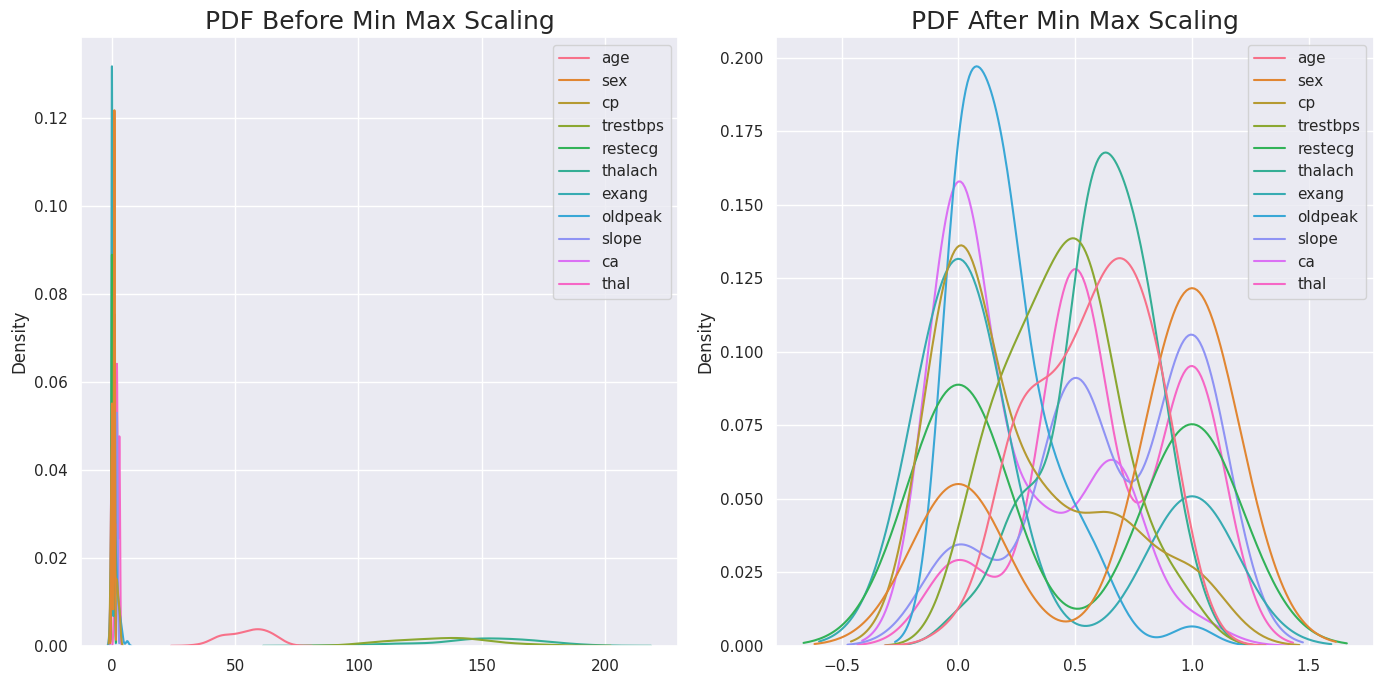

In [42]:
# plotting the PDF graph of before and after Min Max Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Min Max Scaling", fontsize=18)
sns.kdeplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Min Max Scaling", fontsize=18)
sns.kdeplot(data = X_test_min_max_scaled_df, color="red")
plt.tight_layout()
plt.show()

#### Modeling by doing Logistic Regression

In [43]:
# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train_min_max_scaled_df, y_train)

# Making predictions
y_pred = model.predict(X_test_min_max_scaled_df)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.62      0.73        32
           1       0.68      0.90      0.78        29

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61



### Max Absolute Scaling
Scale each feature by its maximum absolute value. This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity. This scaler can also be applied to sparse CSR or CSC matrices.

In [44]:
from sklearn.preprocessing import MaxAbsScaler

# Initialize the MaxAbsScaler
ma = MaxAbsScaler()

# Scale the features
X_train_max_abs_scaled = ma.fit_transform(X_train)
X_test_max_abs_scaled = ma.fit_transform(X_test)

# Convert the scaled features back to a DataFrame
X_train_max_abs_scaled_df = pd.DataFrame(X_train_max_abs_scaled, columns=X_train.columns)
X_test_max_abs_scaled_df = pd.DataFrame(X_test_max_abs_scaled , columns=X_test.columns)

In [45]:
X_train_max_abs_scaled_df

age  sex        cp  trestbps  restecg   thalach  exang   oldpeak  \
0    0.623377  1.0  0.000000      0.62      0.0  0.821782    0.0  0.089286   
1    0.753247  1.0  0.000000      0.64      0.0  0.643564    1.0  0.535714   
2    0.584416  0.0  0.333333      0.65      0.0  0.866337    0.0  0.107143   
3    0.571429  1.0  0.333333      0.60      0.5  0.841584    0.0  0.000000   
4    0.805195  0.0  0.000000      0.75      0.5  0.762376    1.0  0.250000   
..        ...  ...       ...       ...      ...       ...    ...       ...   
236  0.870130  1.0  0.000000      0.60      0.5  0.351485    0.0  0.178571   
237  0.818182  1.0  0.000000      0.70      0.0  0.712871    1.0  0.714286   
238  0.779221  0.0  1.000000      0.75      0.5  0.846535    0.0  0.160714   
239  0.870130  0.0  0.666667      0.76      0.5  0.851485    0.0  0.000000   
240  0.545455  1.0  0.333333      0.60      0.5  0.801980    0.0  0.000000   

     slope    ca      thal  
0      0.5  0.00  1.000000  
1      0.5  0.50  1.000000  
2      0.5  0.00  0.666667  
3      1.0  0.00  0.666667  
4      0.5  0.00  0.666667  
..     ...   ...       ...  
236    0.5  0.00  0.666667  
237    1.0  0.50  1.000000  
238    1.0  0.00  0.666667  
239    1.0  0.25  0.666667  
240    1.0  0.00  0.666667  

[241 rows x 11 columns]

In [46]:
X_test_max_abs_scaled_df

age  sex        cp  trestbps  restecg   thalach  exang   oldpeak  \
0   0.628571  1.0  0.333333  0.730337      0.0  0.989474    0.0  0.000000   
1   0.885714  0.0  0.666667  0.730337      1.0  0.510526    0.0  0.193548   
2   0.828571  0.0  0.000000  0.955056      0.0  0.768421    1.0  0.451613   
3   0.900000  1.0  1.000000  0.814607      0.0  0.789474    0.0  0.370968   
4   0.757143  1.0  0.666667  0.730337      0.0  0.800000    0.0  0.193548   
..       ...  ...       ...       ...      ...       ...    ...       ...   
56  1.000000  1.0  0.333333  0.876404      0.0  0.752632    0.0  0.000000   
57  0.928571  0.0  0.666667  0.786517      0.0  0.826316    0.0  0.129032   
58  0.742857  1.0  0.000000  0.719101      1.0  0.847368    1.0  0.000000   
59  0.942857  1.0  0.000000  0.898876      0.0  0.726316    0.0  0.370968   
60  0.500000  0.0  0.000000  0.775281      1.0  0.957895    0.0  0.225806   

    slope        ca      thal  
0     1.0  0.000000  0.666667  
1     0.5  0.333333  1.000000  
2     0.5  0.666667  0.333333  
3     0.0  0.000000  0.333333  
4     0.0  0.000000  0.666667  
..    ...       ...       ...  
56    1.0  0.000000  0.666667  
57    1.0  0.333333  0.666667  
58    1.0  0.333333  1.000000  
59    1.0  0.000000  0.333333  
60    1.0  0.000000  0.666667  

[61 rows x 11 columns]

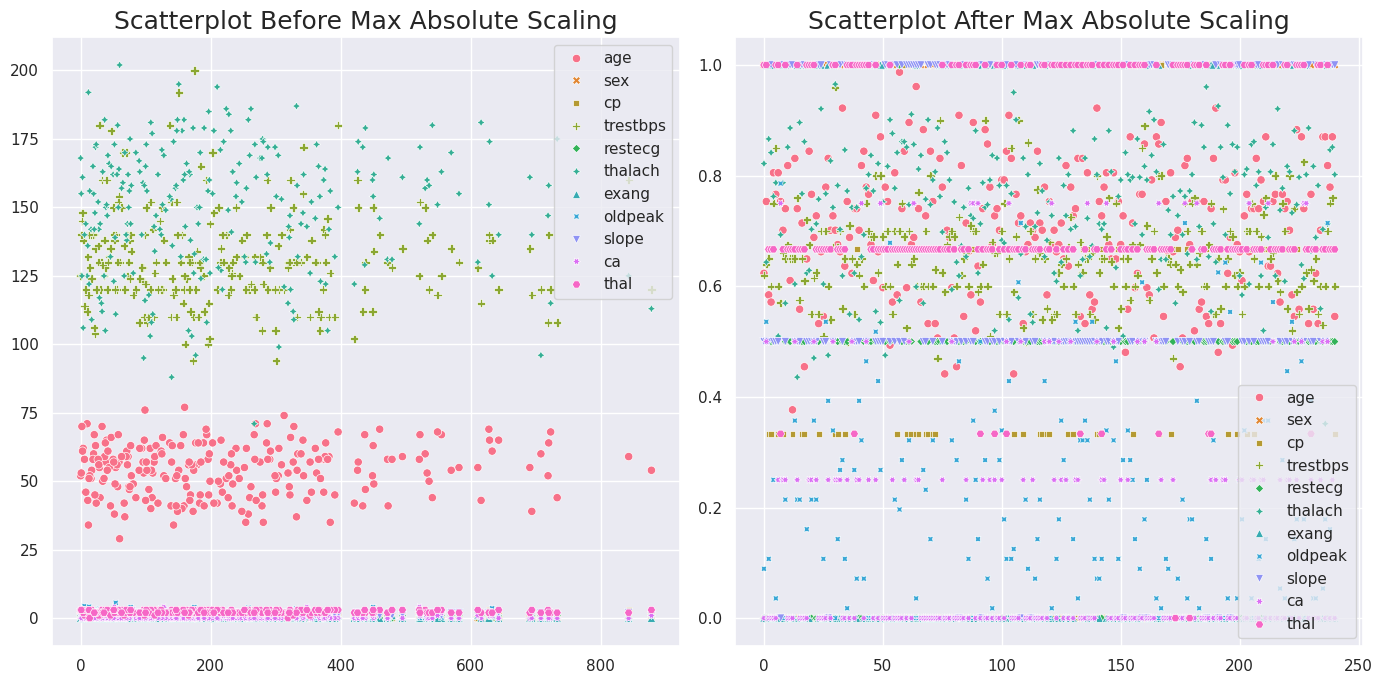

In [47]:
# plotting the scatterplot of before and after Max Absolute Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = X_train_max_abs_scaled_df, color="red")
plt.tight_layout()
plt.show()

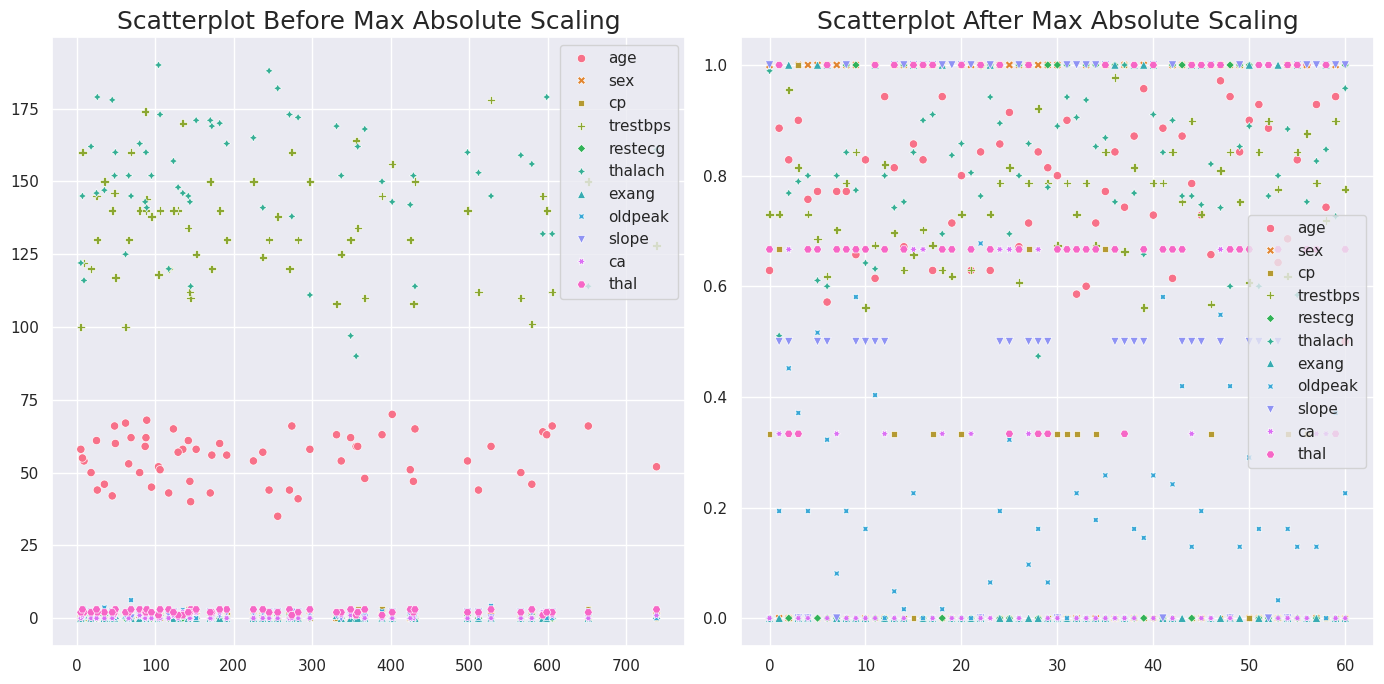

In [48]:
# plotting the scatterplot of before and after Max Absolute Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Max Absolute Scaling", fontsize=18)
sns.scatterplot(data = X_test_max_abs_scaled_df, color="red")
plt.tight_layout()
plt.show()

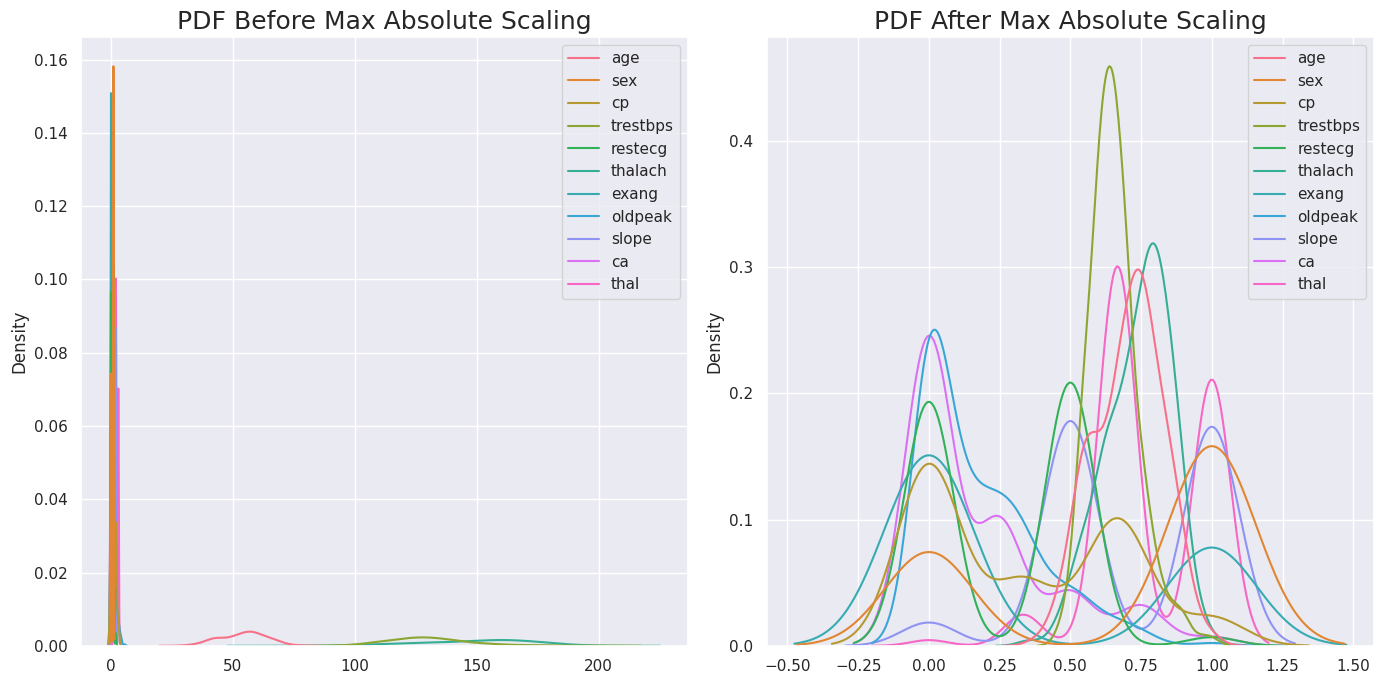

In [49]:
# plotting the PDF graph of before and after max Absolute Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Max Absolute Scaling", fontsize=18)
sns.kdeplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Max Absolute Scaling", fontsize=18)
sns.kdeplot(data = X_train_max_abs_scaled_df, color="red")
plt.tight_layout()
plt.show()

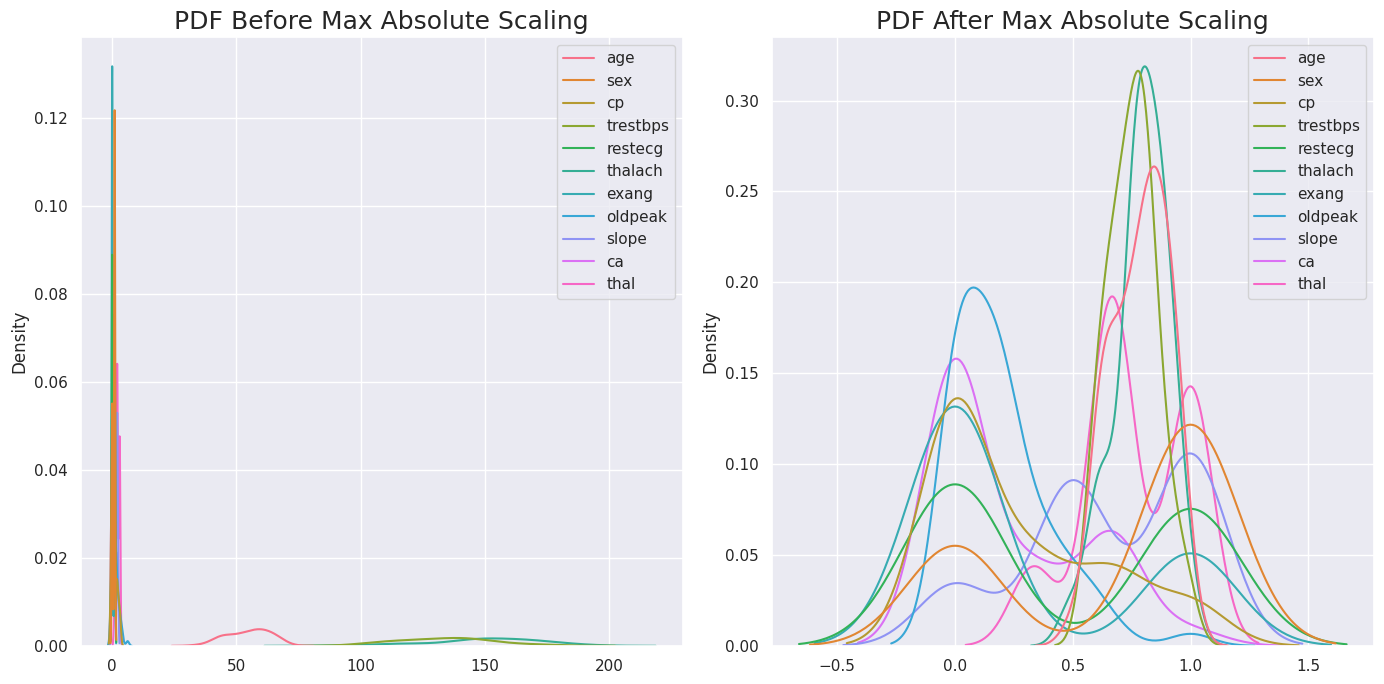

In [50]:
# plotting the PDF graph of before and after max Absolute Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Max Absolute Scaling", fontsize=18)
sns.kdeplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Max Absolute Scaling", fontsize=18)
sns.kdeplot(data = X_test_max_abs_scaled_df, color="red")
plt.tight_layout()
plt.show()

#### Modeling by doing Logistic Regression

In [51]:
# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train_max_abs_scaled_df, y_train)

# Making predictions
y_pred = model.predict(X_test_max_abs_scaled_df)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



### Robust Scaling
This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [52]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
rs = RobustScaler()

# Scale the features
X_train_robust_scaled = ma.fit_transform(X_train)
X_test_robust_scaled = ma.fit_transform(X_test)

# Convert the scaled features back to a DataFrame
X_train_robust_scaled_df = pd.DataFrame(X_train_robust_scaled, columns=X_train.columns)
X_test_robust_scaled_df = pd.DataFrame(X_test_robust_scaled , columns=X_test.columns)

In [53]:
X_train_robust_scaled_df

age  sex        cp  trestbps  restecg   thalach  exang   oldpeak  \
0    0.623377  1.0  0.000000      0.62      0.0  0.821782    0.0  0.089286   
1    0.753247  1.0  0.000000      0.64      0.0  0.643564    1.0  0.535714   
2    0.584416  0.0  0.333333      0.65      0.0  0.866337    0.0  0.107143   
3    0.571429  1.0  0.333333      0.60      0.5  0.841584    0.0  0.000000   
4    0.805195  0.0  0.000000      0.75      0.5  0.762376    1.0  0.250000   
..        ...  ...       ...       ...      ...       ...    ...       ...   
236  0.870130  1.0  0.000000      0.60      0.5  0.351485    0.0  0.178571   
237  0.818182  1.0  0.000000      0.70      0.0  0.712871    1.0  0.714286   
238  0.779221  0.0  1.000000      0.75      0.5  0.846535    0.0  0.160714   
239  0.870130  0.0  0.666667      0.76      0.5  0.851485    0.0  0.000000   
240  0.545455  1.0  0.333333      0.60      0.5  0.801980    0.0  0.000000   

     slope    ca      thal  
0      0.5  0.00  1.000000  
1      0.5  0.50  1.000000  
2      0.5  0.00  0.666667  
3      1.0  0.00  0.666667  
4      0.5  0.00  0.666667  
..     ...   ...       ...  
236    0.5  0.00  0.666667  
237    1.0  0.50  1.000000  
238    1.0  0.00  0.666667  
239    1.0  0.25  0.666667  
240    1.0  0.00  0.666667  

[241 rows x 11 columns]

In [54]:
X_test_robust_scaled_df

age  sex        cp  trestbps  restecg   thalach  exang   oldpeak  \
0   0.628571  1.0  0.333333  0.730337      0.0  0.989474    0.0  0.000000   
1   0.885714  0.0  0.666667  0.730337      1.0  0.510526    0.0  0.193548   
2   0.828571  0.0  0.000000  0.955056      0.0  0.768421    1.0  0.451613   
3   0.900000  1.0  1.000000  0.814607      0.0  0.789474    0.0  0.370968   
4   0.757143  1.0  0.666667  0.730337      0.0  0.800000    0.0  0.193548   
..       ...  ...       ...       ...      ...       ...    ...       ...   
56  1.000000  1.0  0.333333  0.876404      0.0  0.752632    0.0  0.000000   
57  0.928571  0.0  0.666667  0.786517      0.0  0.826316    0.0  0.129032   
58  0.742857  1.0  0.000000  0.719101      1.0  0.847368    1.0  0.000000   
59  0.942857  1.0  0.000000  0.898876      0.0  0.726316    0.0  0.370968   
60  0.500000  0.0  0.000000  0.775281      1.0  0.957895    0.0  0.225806   

    slope        ca      thal  
0     1.0  0.000000  0.666667  
1     0.5  0.333333  1.000000  
2     0.5  0.666667  0.333333  
3     0.0  0.000000  0.333333  
4     0.0  0.000000  0.666667  
..    ...       ...       ...  
56    1.0  0.000000  0.666667  
57    1.0  0.333333  0.666667  
58    1.0  0.333333  1.000000  
59    1.0  0.000000  0.333333  
60    1.0  0.000000  0.666667  

[61 rows x 11 columns]

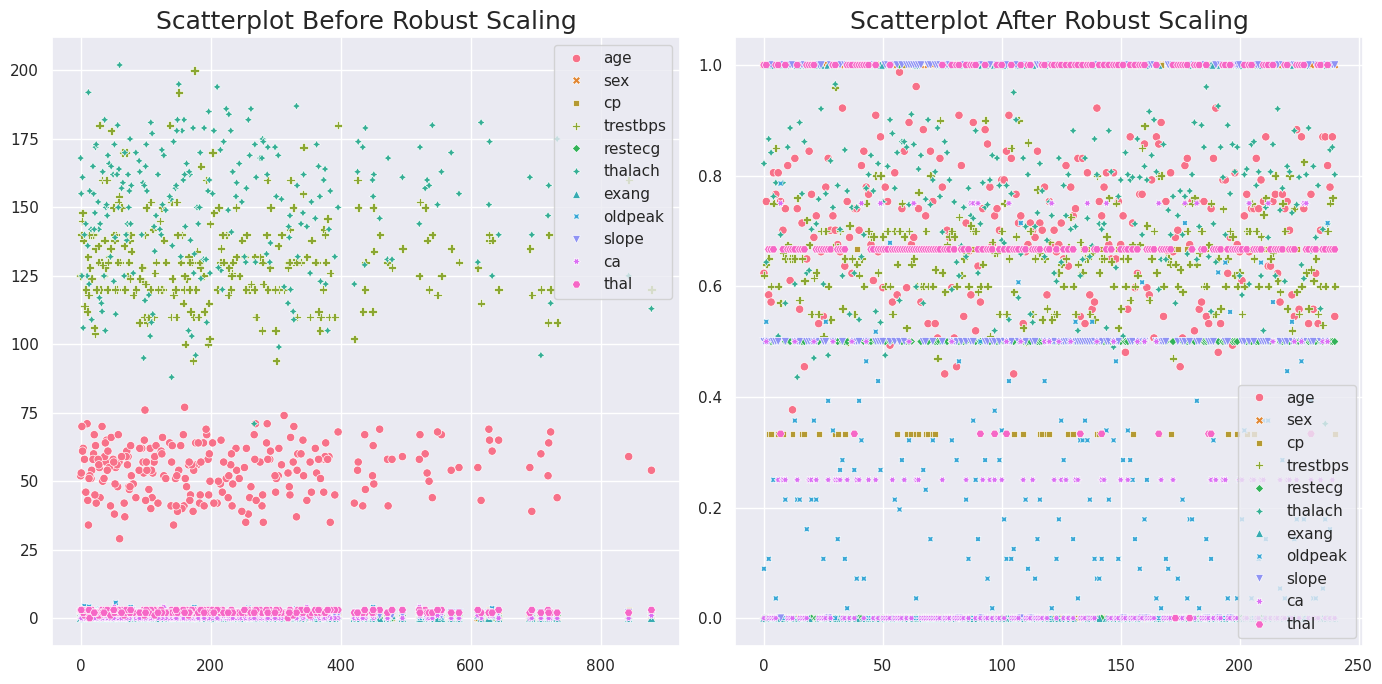

In [55]:
# plotting the scatterplot of before and after Robust Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Robust Scaling", fontsize=18)
sns.scatterplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Robust Scaling", fontsize=18)
sns.scatterplot(data = X_train_robust_scaled_df, color="red")
plt.tight_layout()
plt.show()

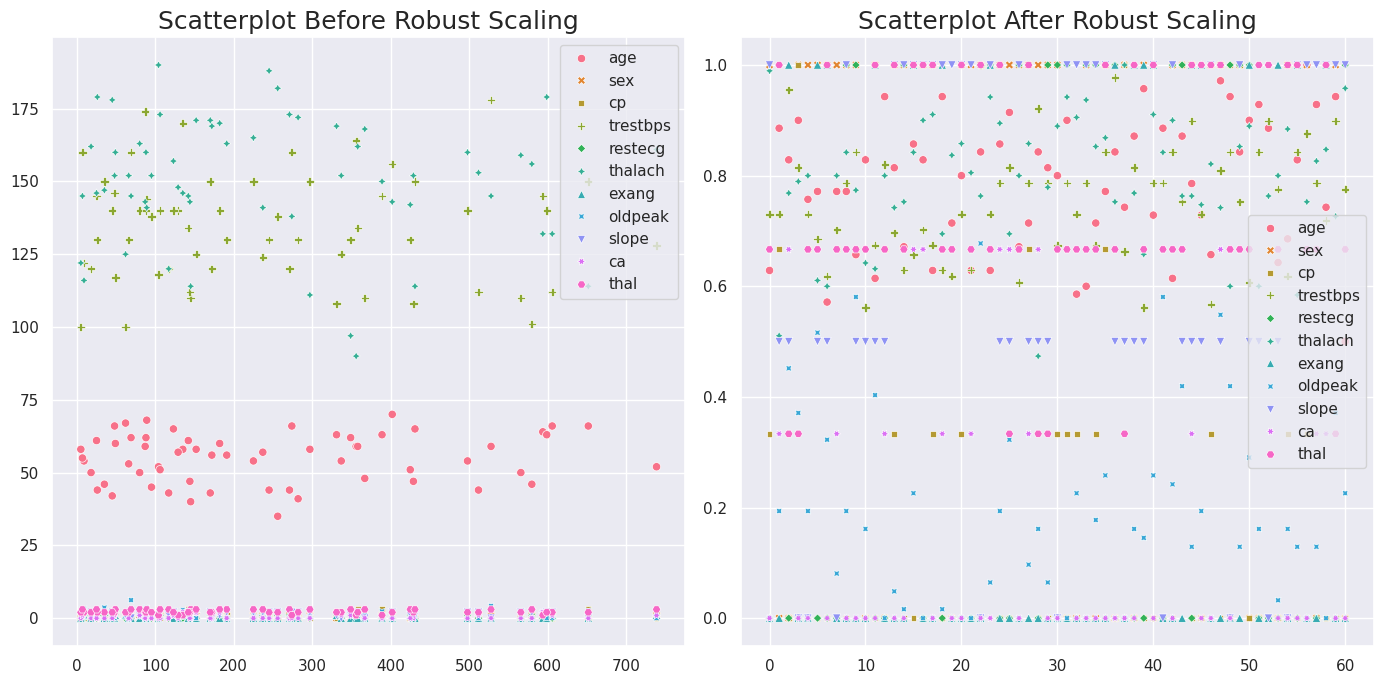

In [56]:
# plotting the scatterplot of before and after Robust Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Robust Scaling", fontsize=18)
sns.scatterplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Robust Scaling", fontsize=18)
sns.scatterplot(data = X_test_robust_scaled_df, color="red")
plt.tight_layout()
plt.show()

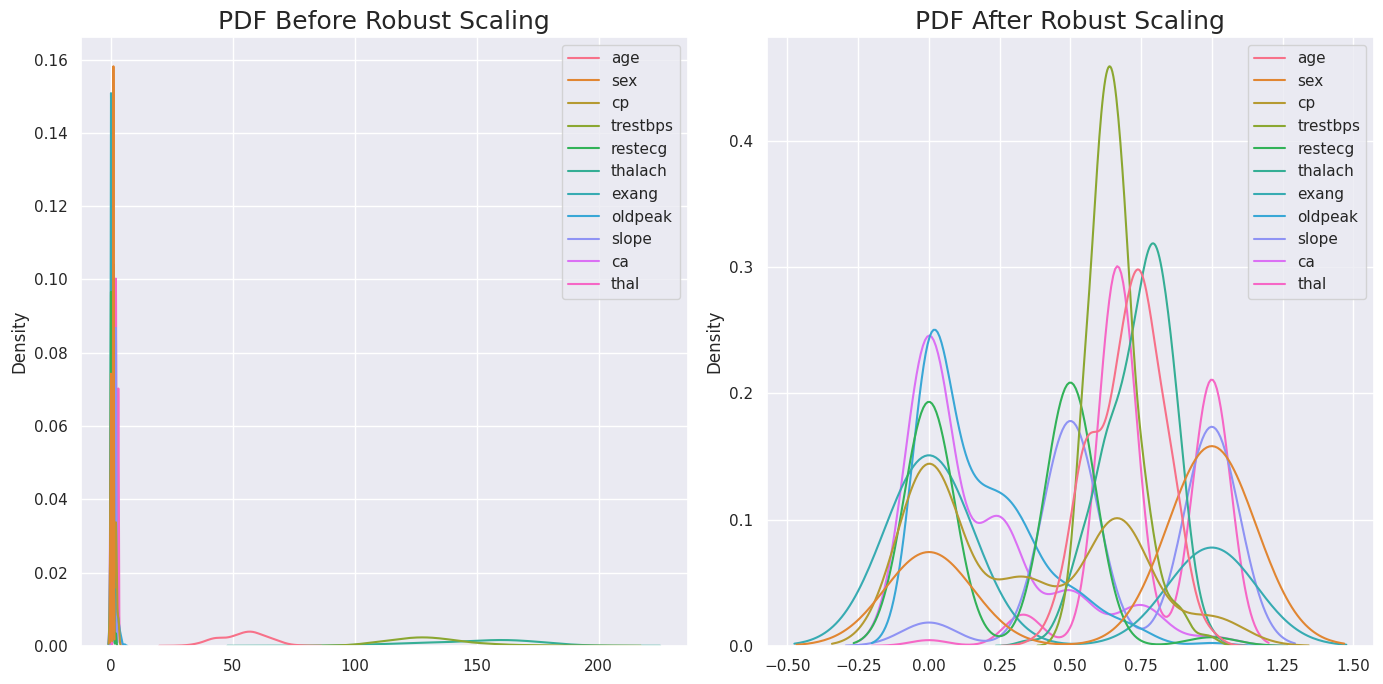

In [57]:
# plotting the PDf graph of before and after Robust Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data = X_train_robust_scaled_df, color="red")
plt.tight_layout()
plt.show()

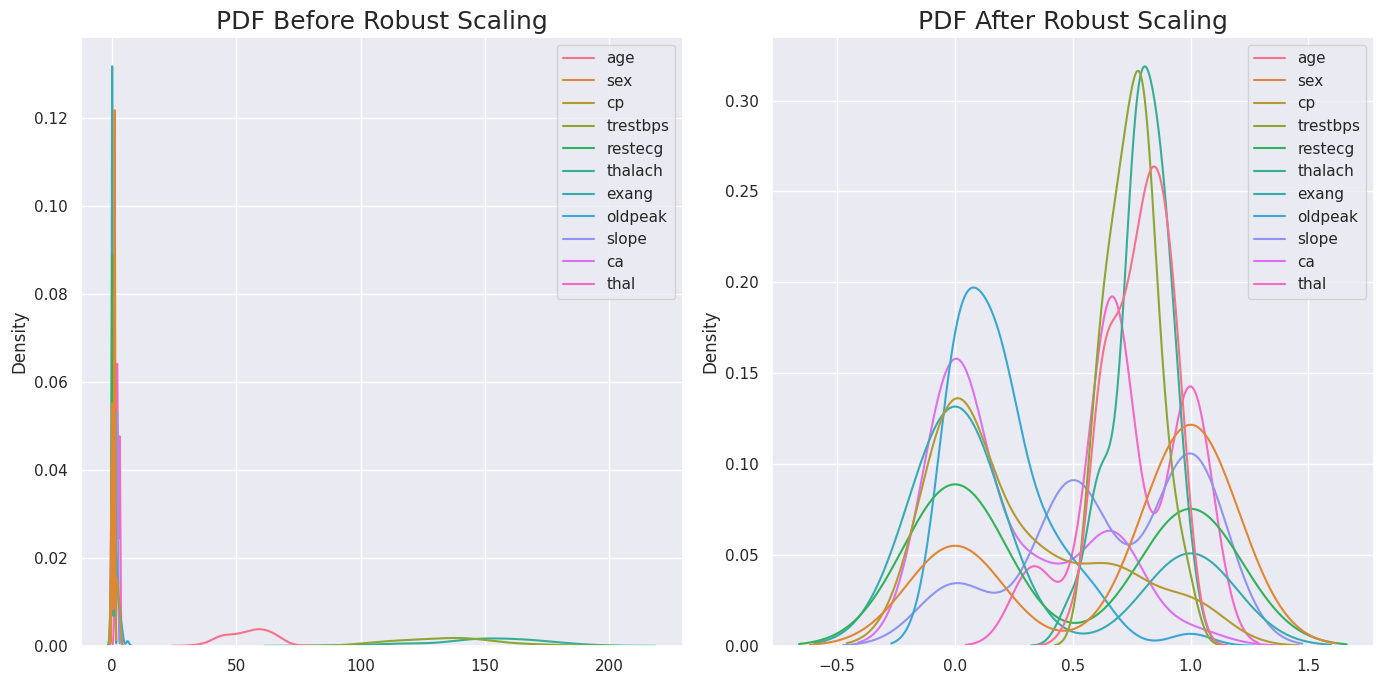

In [58]:
# plotting the PDf graph of before and after Robust Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data = X_test_robust_scaled_df, color="red")
plt.tight_layout()
plt.show()

#### Modeling by doing Logistic Regression

In [59]:
# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train_robust_scaled_df, y_train)

# Making predictions
y_pred = model.predict(X_test_robust_scaled_df)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



### Mean Normalization
It is very similar to Min Max Scaling, just that we use mean to normalize the data. Removes the mean from the data and scales it into max and min values.

In [60]:
# Define the mean normalization function
def mean_normalize(data, columns):
    normalized_data = data.copy()
    for column in columns:
        mean = data[column].mean()
        range_ = data[column].max() - data[column].min()
        normalized_data[column] = (data[column] - mean) / range_
    return normalized_data

# Scale the features
X_train_mean_scaled = mean_normalize(X_train, X_train.columns)
X_test_mean_scaled = mean_normalize(X_test, X_test.columns)

# Convert the scaled features back to DataFrames
X_train_mean_scaled_df = pd.DataFrame(X_train_mean_scaled, columns=X_train.columns)
X_test_mean_scaled_df = pd.DataFrame(X_test_mean_scaled, columns=X_test.columns)

In [61]:
X_train_mean_scaled_df

age       sex        cp  trestbps   restecg   thalach     exang  \
163 -0.130878  0.319502 -0.334716 -0.065646 -0.271784  0.126825 -0.340249   
291  0.077455  0.319502 -0.334716 -0.027910 -0.271784 -0.147984  0.659751   
280 -0.193378 -0.680498 -0.001383 -0.009043 -0.271784  0.195528 -0.340249   
85  -0.214212  0.319502 -0.001383 -0.103382  0.228216  0.157360 -0.340249   
239  0.160788 -0.680498 -0.334716  0.179637  0.228216  0.035222  0.659751   
..        ...       ...       ...       ...       ...       ...       ...   
267  0.264955  0.319502 -0.334716 -0.103382  0.228216 -0.598366 -0.340249   
77   0.181622  0.319502 -0.334716  0.085297 -0.271784 -0.041114  0.659751   
125  0.119122 -0.680498  0.665284  0.179637  0.228216  0.164993 -0.340249   
522  0.264955 -0.680498  0.331950  0.198505  0.228216  0.172627 -0.340249   
119 -0.255878  0.319502 -0.001383 -0.103382  0.228216  0.096291 -0.340249   

      oldpeak     slope        ca      thal  
163 -0.090175 -0.209544 -0.180498  0.224066  
291  0.356254 -0.209544  0.319502  0.224066  
280 -0.072318 -0.209544 -0.180498 -0.109267  
85  -0.179461  0.290456 -0.180498 -0.109267  
239  0.070539 -0.209544 -0.180498 -0.109267  
..        ...       ...       ...       ...  
267 -0.000889 -0.209544 -0.180498 -0.109267  
77   0.534825  0.290456  0.319502  0.224066  
125 -0.018746  0.290456 -0.180498 -0.109267  
522 -0.179461  0.290456  0.069502 -0.109267  
119 -0.179461  0.290456 -0.180498 -0.109267  

[241 rows x 11 columns]

In [62]:
X_test_mean_scaled_df

age       sex        cp  trestbps   restecg   thalach     exang  \
245 -0.313349  0.311475  0.065574 -0.053174 -0.459016  0.377049 -0.278689   
349  0.200937 -0.688525  0.398907 -0.053174  0.540984 -0.532951 -0.278689   
135  0.086651 -0.688525 -0.267760  0.459647 -0.459016 -0.042951  0.721311   
389  0.229508  0.311475  0.732240  0.139134 -0.459016 -0.002951 -0.278689   
66  -0.056206  0.311475  0.398907 -0.053174 -0.459016  0.017049 -0.278689   
..        ...       ...       ...       ...       ...       ...       ...   
402  0.429508  0.311475  0.065574  0.280160 -0.459016 -0.072951 -0.278689   
123  0.286651 -0.688525  0.398907  0.075032 -0.459016  0.067049 -0.278689   
739 -0.084778  0.311475 -0.267760 -0.078815  0.540984  0.107049  0.721311   
274  0.315222  0.311475 -0.267760  0.331442 -0.459016 -0.122951 -0.278689   
256 -0.570492 -0.688525 -0.267760  0.049391  0.540984  0.317049 -0.278689   

      oldpeak     slope        ca      thal  
245 -0.192491  0.344262 -0.234973 -0.131148  
349  0.001058 -0.155738  0.098361  0.368852  
135  0.259122 -0.155738  0.431694 -0.631148  
389  0.178477 -0.655738 -0.234973 -0.631148  
66   0.001058 -0.655738 -0.234973 -0.131148  
..        ...       ...       ...       ...  
402 -0.192491  0.344262 -0.234973 -0.131148  
123 -0.063458  0.344262  0.098361 -0.131148  
739 -0.192491  0.344262  0.098361  0.368852  
274  0.178477  0.344262 -0.234973 -0.631148  
256  0.033316  0.344262 -0.234973 -0.131148  

[61 rows x 11 columns]

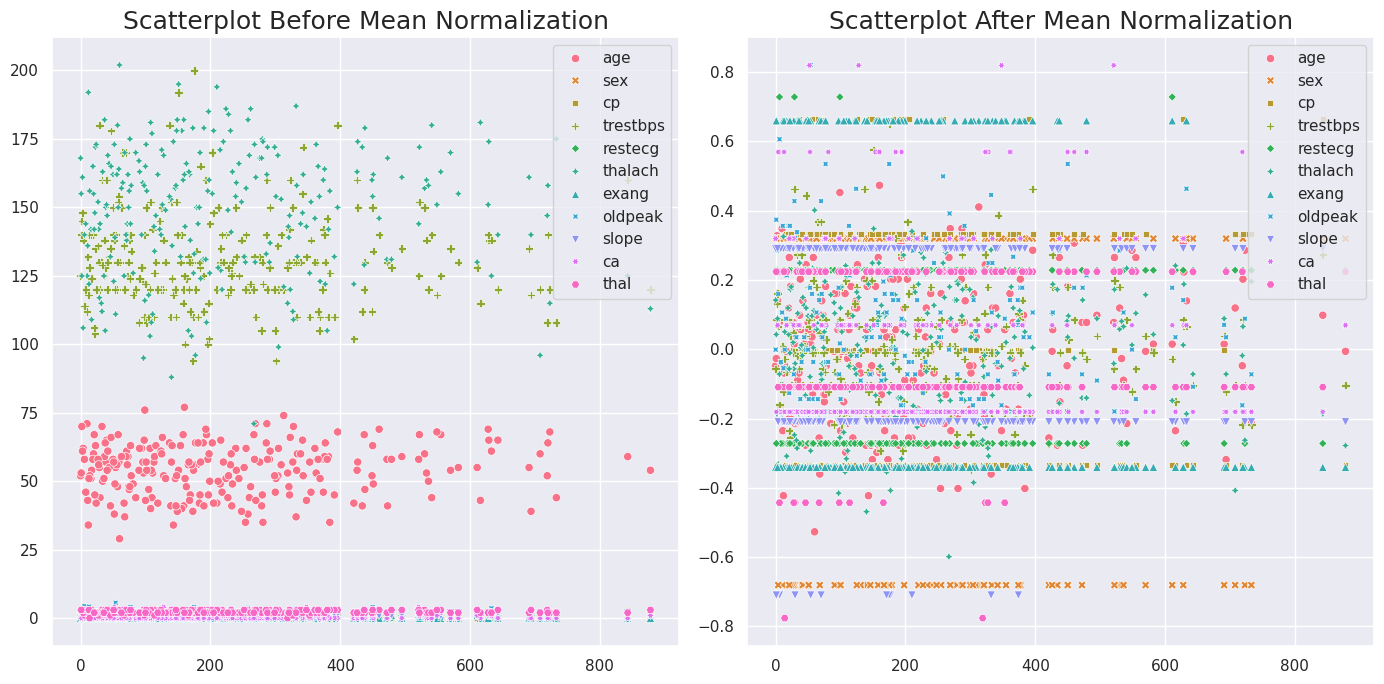

In [63]:
# plotting the scatterplot of before and after Mean Normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Mean Normalization", fontsize=18)
sns.scatterplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Mean Normalization", fontsize=18)
sns.scatterplot(data = X_train_mean_scaled_df, color="red")
plt.tight_layout()
plt.show()

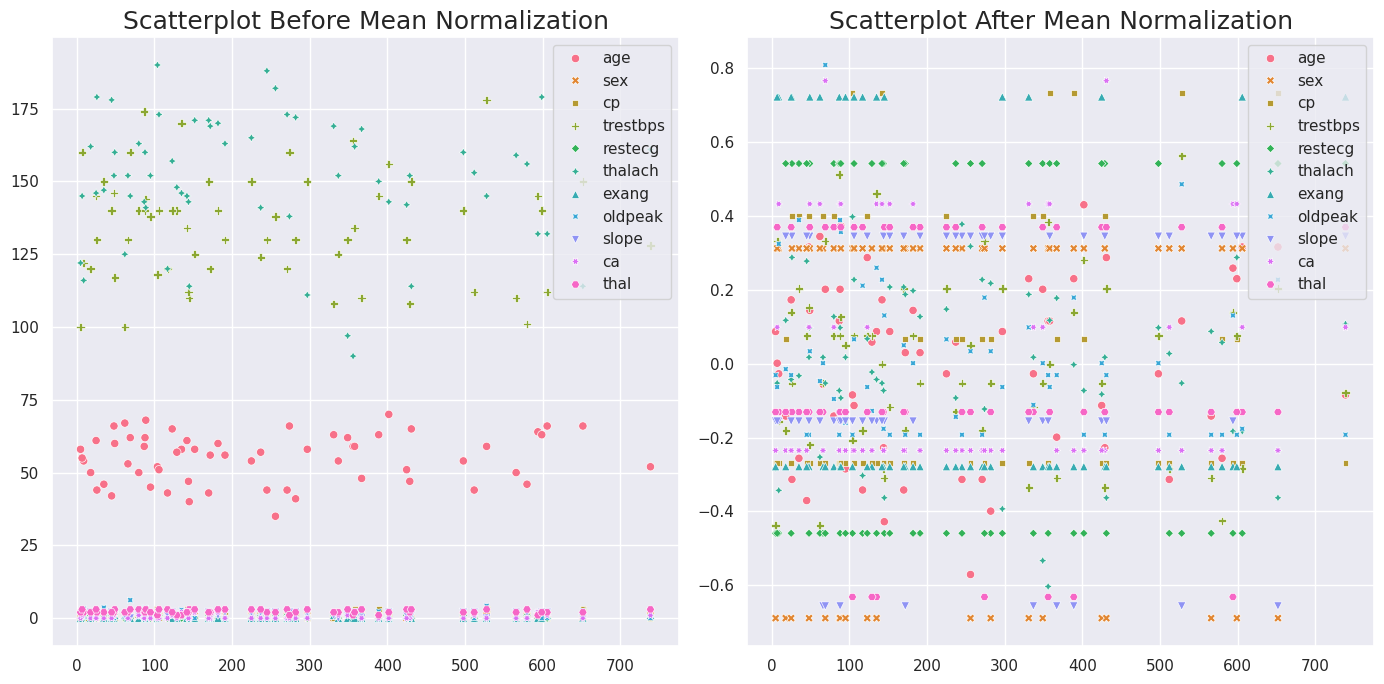

In [64]:
# plotting the scatterplot of before and after Mean Normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Mean Normalization", fontsize=18)
sns.scatterplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Mean Normalization", fontsize=18)
sns.scatterplot(data = X_test_mean_scaled_df, color="red")
plt.tight_layout()
plt.show()

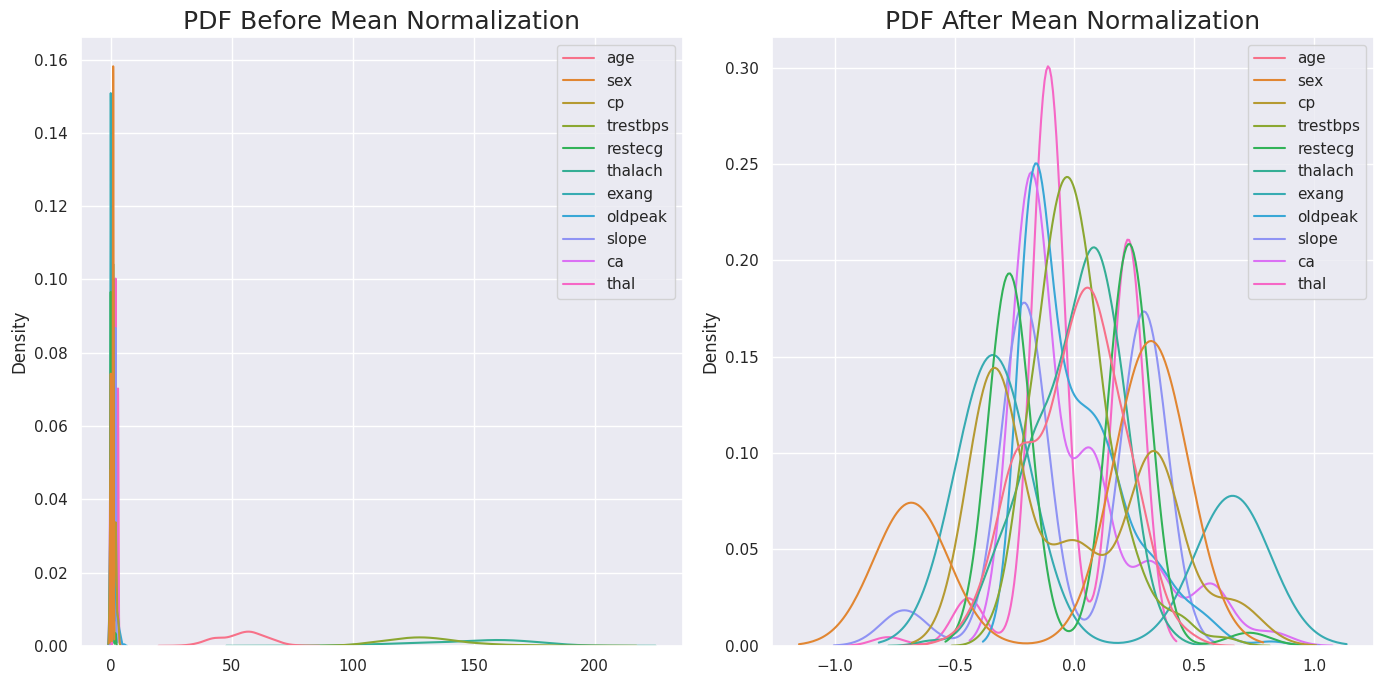

In [65]:
# plotting the PDf graph of before and after Mean Normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Mean Normalization", fontsize=18)
sns.kdeplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Mean Normalization", fontsize=18)
sns.kdeplot(data = X_train_mean_scaled_df, color="red")
plt.tight_layout()
plt.show()

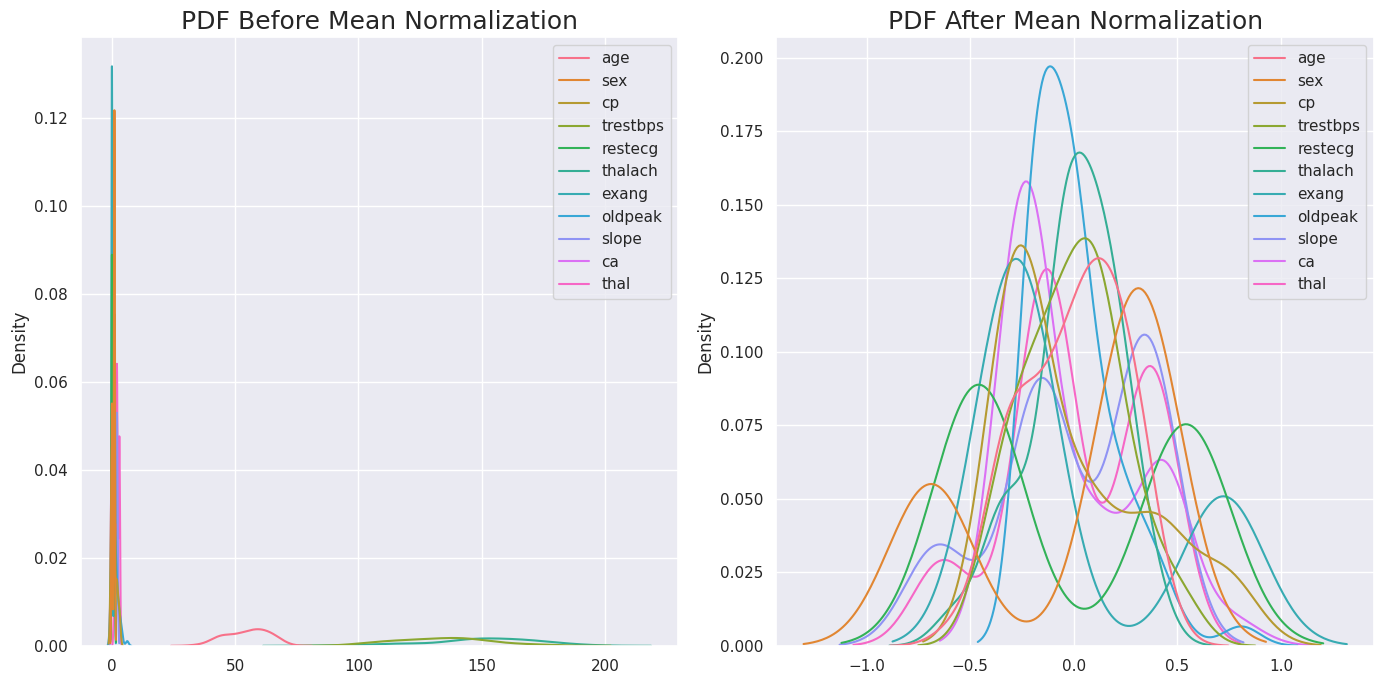

In [66]:
# plotting the PDf graph of before and after Mean Normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Mean Normalization", fontsize=18)
sns.kdeplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Mean Normalization", fontsize=18)
sns.kdeplot(data = X_test_mean_scaled_df, color="red")
plt.tight_layout()
plt.show()

#### Modeling by doing Logistic Regression

In [67]:
# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train_mean_scaled_df, y_train)

# Making predictions
y_pred = model.predict(X_test_mean_scaled_df)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.62      0.73        32
           1       0.68      0.90      0.78        29

    accuracy                           0.75        61
   macro avg       0.78      0.76      0.75        61
weighted avg       0.78      0.75      0.75        61



### Unit Vector Normalization
Unit vector scaling, also known as vector normalization, scales each feature vector to have a unit norm. This technique is particularly useful when the magnitude of features is important but their direction is irrelevant. By scaling each feature vector to have a length of 1, unit vector scaling ensures that features contribute equally to the model regardless of their original magnitudes.





In [68]:
from sklearn.preprocessing import normalize

# Scale the features
X_train_normalize_scaled = normalize(X_train, axis=0)
X_test_normalize_scaled = ma.fit_transform(X_test)

# Convert the scaled features back to a DataFrame
X_train_normalize_scaled_df = pd.DataFrame(X_train_normalize_scaled, columns=X_train.columns)
X_test_normalize_scaled_df = pd.DataFrame(X_test_normalize_scaled , columns=X_test.columns)

In [69]:
X_train_normalize_scaled_df

age       sex        cp  trestbps   restecg   thalach     exang  \
0    0.056159  0.078087  0.000000  0.060470  0.000000  0.070734  0.000000   
1    0.067859  0.078087  0.000000  0.062421  0.000000  0.055394  0.110432   
2    0.052649  0.000000  0.044901  0.063396  0.000000  0.074569  0.000000   
3    0.051479  0.078087  0.044901  0.058519  0.084819  0.072438  0.000000   
4    0.072539  0.000000  0.000000  0.073149  0.084819  0.065621  0.110432   
..        ...       ...       ...       ...       ...       ...       ...   
236  0.078389  0.078087  0.000000  0.058519  0.084819  0.030254  0.000000   
237  0.073709  0.078087  0.000000  0.068273  0.000000  0.061359  0.110432   
238  0.070199  0.000000  0.134704  0.073149  0.084819  0.072864  0.000000   
239  0.078389  0.000000  0.089803  0.074124  0.084819  0.073291  0.000000   
240  0.049139  0.078087  0.044901  0.058519  0.084819  0.069029  0.000000   

      oldpeak     slope        ca      thal  
0    0.021315  0.041959  0.000000  0.080380  
1    0.127890  0.041959  0.102869  0.080380  
2    0.025578  0.041959  0.000000  0.053586  
3    0.000000  0.083918  0.000000  0.053586  
4    0.059682  0.041959  0.000000  0.053586  
..        ...       ...       ...       ...  
236  0.042630  0.041959  0.000000  0.053586  
237  0.170520  0.083918  0.102869  0.080380  
238  0.038367  0.083918  0.000000  0.053586  
239  0.000000  0.083918  0.051434  0.053586  
240  0.000000  0.083918  0.000000  0.053586  

[241 rows x 11 columns]

In [70]:
X_test_normalize_scaled_df

age  sex        cp  trestbps  restecg   thalach  exang   oldpeak  \
0   0.628571  1.0  0.333333  0.730337      0.0  0.989474    0.0  0.000000   
1   0.885714  0.0  0.666667  0.730337      1.0  0.510526    0.0  0.193548   
2   0.828571  0.0  0.000000  0.955056      0.0  0.768421    1.0  0.451613   
3   0.900000  1.0  1.000000  0.814607      0.0  0.789474    0.0  0.370968   
4   0.757143  1.0  0.666667  0.730337      0.0  0.800000    0.0  0.193548   
..       ...  ...       ...       ...      ...       ...    ...       ...   
56  1.000000  1.0  0.333333  0.876404      0.0  0.752632    0.0  0.000000   
57  0.928571  0.0  0.666667  0.786517      0.0  0.826316    0.0  0.129032   
58  0.742857  1.0  0.000000  0.719101      1.0  0.847368    1.0  0.000000   
59  0.942857  1.0  0.000000  0.898876      0.0  0.726316    0.0  0.370968   
60  0.500000  0.0  0.000000  0.775281      1.0  0.957895    0.0  0.225806   

    slope        ca      thal  
0     1.0  0.000000  0.666667  
1     0.5  0.333333  1.000000  
2     0.5  0.666667  0.333333  
3     0.0  0.000000  0.333333  
4     0.0  0.000000  0.666667  
..    ...       ...       ...  
56    1.0  0.000000  0.666667  
57    1.0  0.333333  0.666667  
58    1.0  0.333333  1.000000  
59    1.0  0.000000  0.333333  
60    1.0  0.000000  0.666667  

[61 rows x 11 columns]

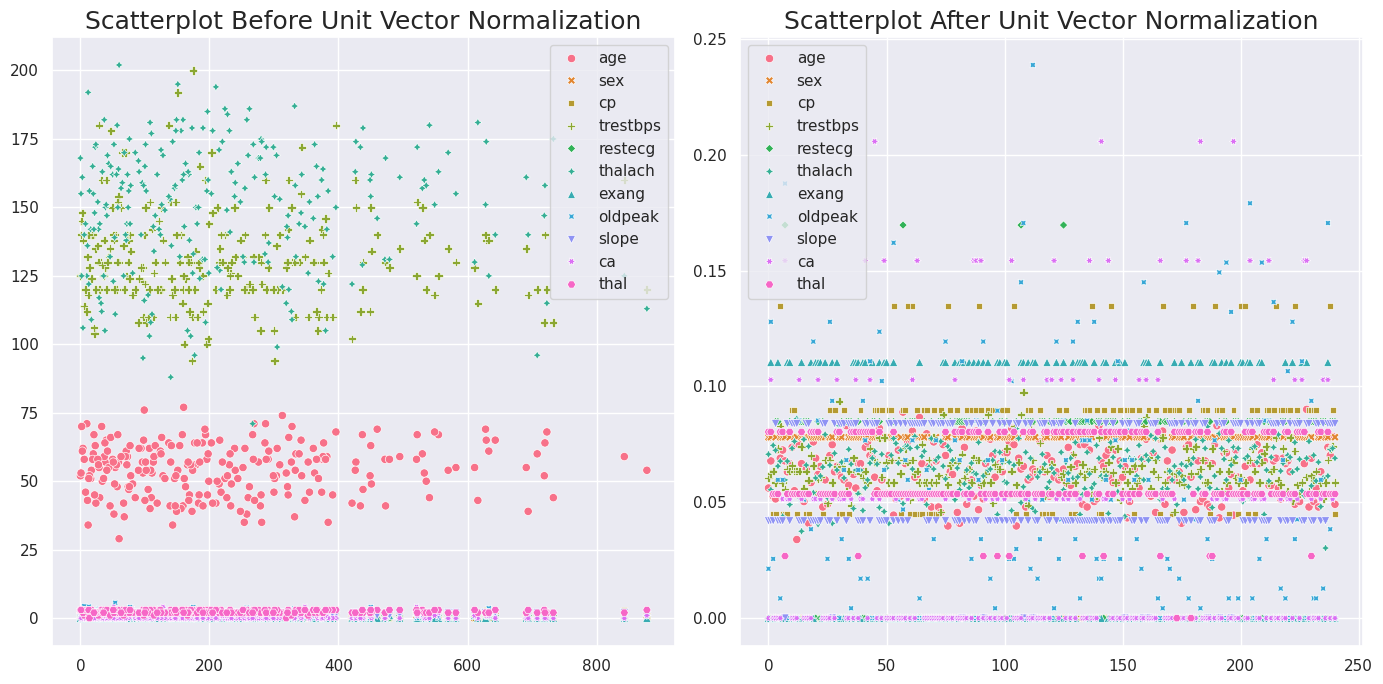

In [71]:
# plotting the scatterplot of before and after Unit Vector Normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Unit Vector Normalization", fontsize=18)
sns.scatterplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Unit Vector Normalization", fontsize=18)
sns.scatterplot(data = X_train_normalize_scaled_df, color="red")
plt.tight_layout()
plt.show()

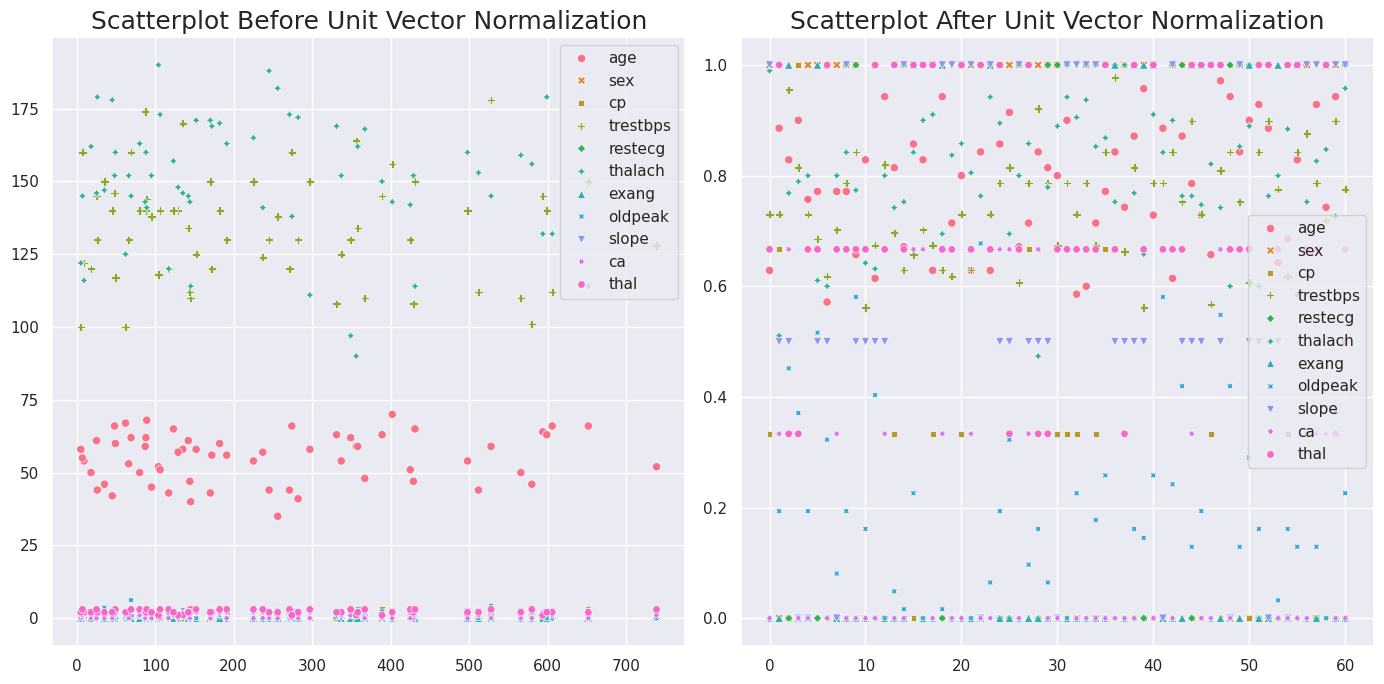

In [72]:
# plotting the scatterplot of before and after Unit Vector Normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Unit Vector Normalization", fontsize=18)
sns.scatterplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Unit Vector Normalization", fontsize=18)
sns.scatterplot(data = X_test_normalize_scaled_df, color="red")
plt.tight_layout()
plt.show()

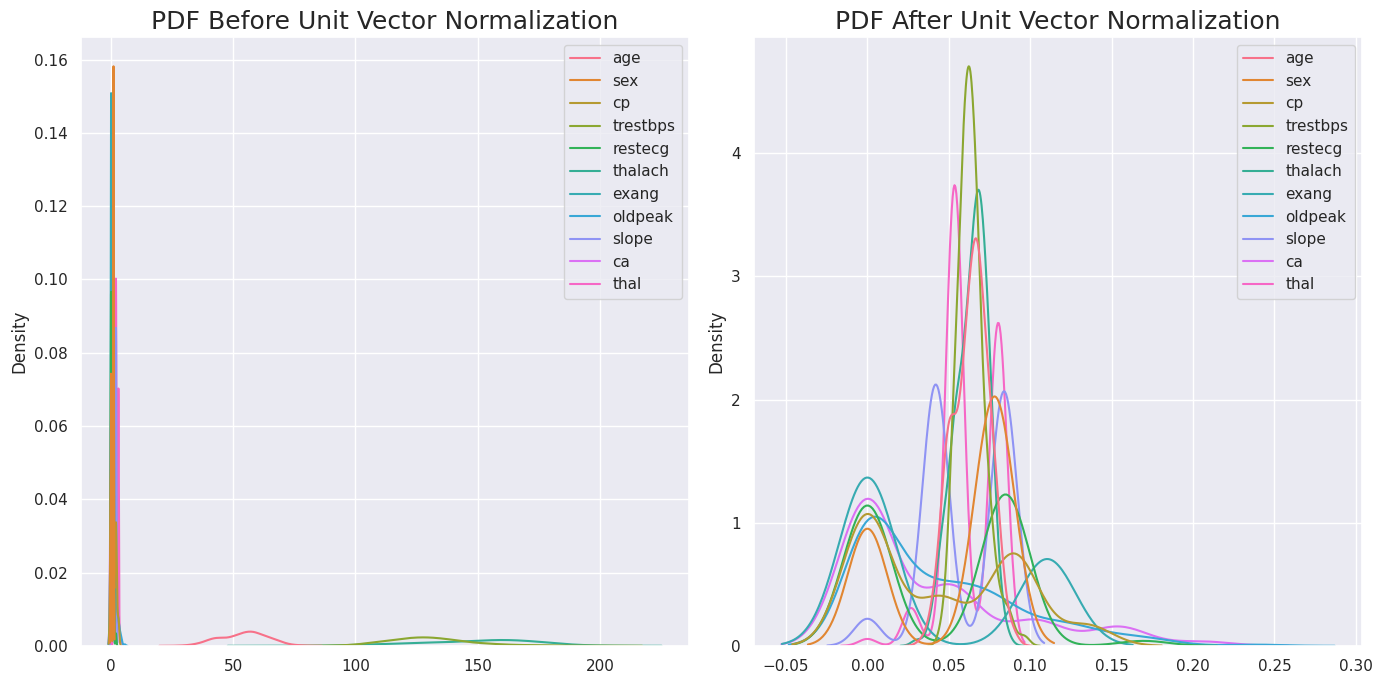

In [73]:
# plotting the PDf graph of before and after Unit Vector Normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Unit Vector Normalization", fontsize=18)
sns.kdeplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Unit Vector Normalization", fontsize=18)
sns.kdeplot(data = X_train_normalize_scaled_df, color="red")
plt.tight_layout()
plt.show()

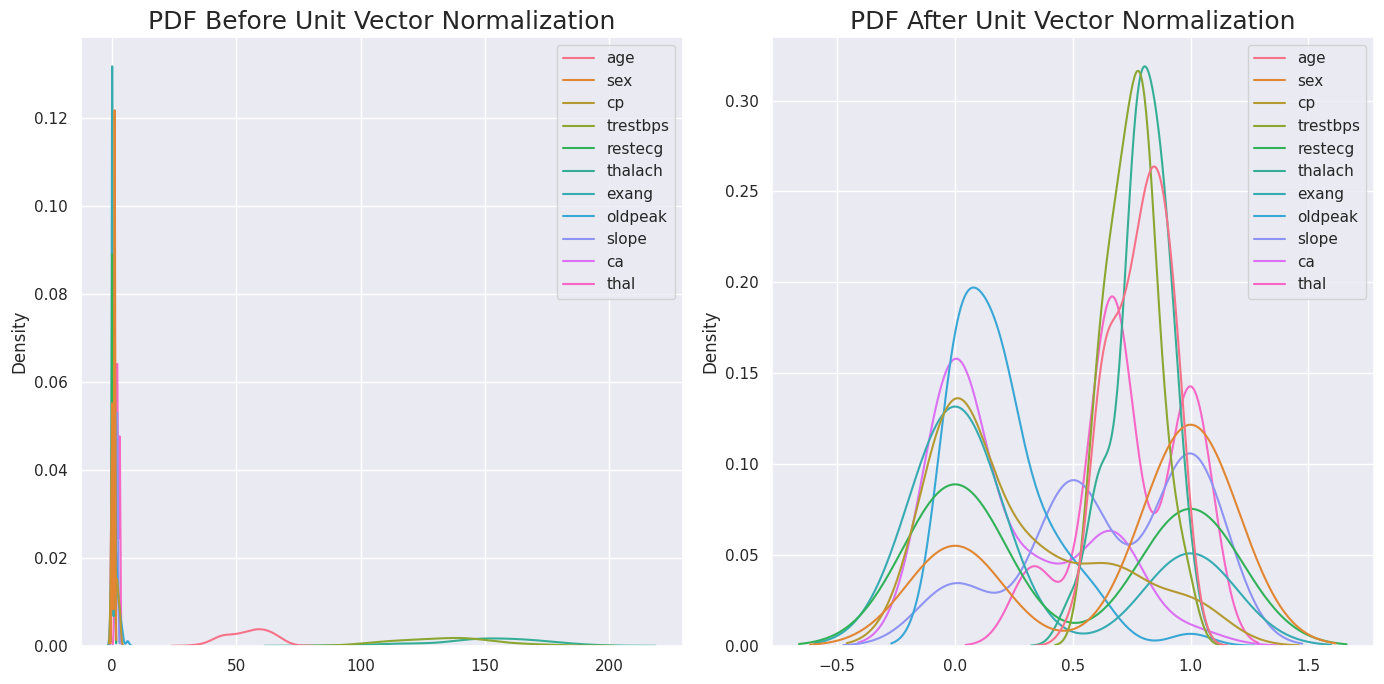

In [74]:
# plotting the PDf graph of before and after Unit Vector Normalization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Unit Vector Normalization", fontsize=18)
sns.kdeplot(data = X_test, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Unit Vector Normalization", fontsize=18)
sns.kdeplot(data = X_test_normalize_scaled_df, color="red")
plt.tight_layout()
plt.show()

#### Modeling by doing Logistic Regression

In [75]:
# Initializing the logistic regression model
model = LogisticRegression()

# Training the model
model.fit(X_train_normalize_scaled_df, y_train)

# Making predictions
y_pred = model.predict(X_test_normalize_scaled_df)

# Evaluating the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

